In [1]:
#importing important libraries for performing EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder,Imputer
import warnings
warnings.filterwarnings('ignore')

In [2]:
hrt=pd.read_csv('CLEVELAND.csv',names=('age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','malady'),na_values='?')

In [3]:
hrt

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,malady
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [4]:
hrt.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,malady
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [5]:
hrt.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,malady
293,63.0,1.0,4.0,140.0,187.0,0.0,2.0,144.0,1.0,4.0,1.0,2.0,7.0,2
294,63.0,0.0,4.0,124.0,197.0,0.0,0.0,136.0,1.0,0.0,2.0,0.0,3.0,1
295,41.0,1.0,2.0,120.0,157.0,0.0,0.0,182.0,0.0,0.0,1.0,0.0,3.0,0
296,59.0,1.0,4.0,164.0,176.0,1.0,2.0,90.0,0.0,1.0,2.0,2.0,6.0,3
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


In [6]:
hrt.shape

(303, 14)

In [7]:
hrt.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,malady
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,False,False,False,False,False,False,False,False,False,False,False,False,False,False
299,False,False,False,False,False,False,False,False,False,False,False,False,False,False
300,False,False,False,False,False,False,False,False,False,False,False,False,False,False
301,False,False,False,False,False,False,False,False,False,False,False,False,False,False


Text(0.5, 1, 'HEATMAP TO VISUALIZE NULL VALUES')

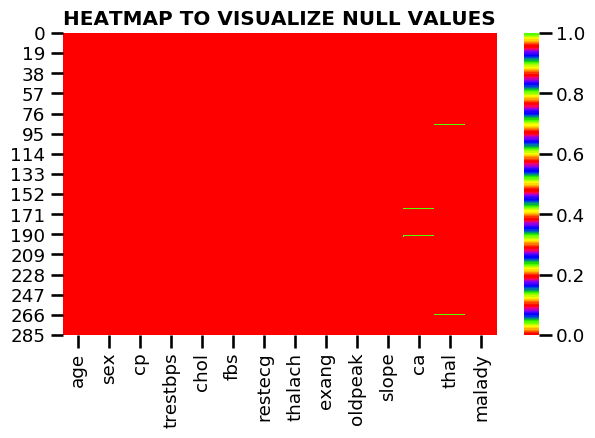

In [8]:
#visualizing the presence of nan values by heatmap
plt.figure(dpi=100,figsize=(7,4))
sns.set_context('talk',font_scale=0.8)
sns.heatmap(hrt.isnull(),cmap='prism')
plt.title('HEATMAP TO VISUALIZE NULL VALUES',weight='bold')

In [9]:
hrt.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
malady      0
dtype: int64

In [10]:
hrt['ca'].mode()

0    0.0
dtype: float64

In [11]:
hrt['thal'].mode()

0    3.0
dtype: float64

In [13]:
hrt['ca'].replace(np.NaN,0.0,inplace=True)
hrt['thal'].replace(np.NaN,3.0,inplace=True)

In [14]:
hrt.isnull().sum()
#rechecking null value presence

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
malady      0
dtype: int64

all null values have been removed

In [16]:
hrt.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
malady        int64
dtype: object

In [17]:
#converting datatypes of sex,cp,fbs,exang,slope,ca,thal from float to as they replresent a categorical value
hrt['sex']=hrt['sex'].astype('int64')
hrt['cp']=hrt['cp'].astype('int64')
hrt['fbs']=hrt['fbs'].astype('int64')
hrt['restecg']=hrt['restecg'].astype('int64')
hrt['exang']=hrt['exang'].astype('int64')
hrt['slope']=hrt['slope'].astype('int64')
hrt['ca']=hrt['ca'].astype('int64')
hrt['thal']=hrt['thal'].astype('int64')

In [18]:
hrt.tail(7)
#visualizing the conversion of datatypes of categorical features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,malady
296,59.0,1,4,164.0,176.0,1,2,90.0,0,1.0,2,2,6,3
297,57.0,0,4,140.0,241.0,0,0,123.0,1,0.2,2,0,7,1
298,45.0,1,1,110.0,264.0,0,0,132.0,0,1.2,2,0,7,1
299,68.0,1,4,144.0,193.0,1,0,141.0,0,3.4,2,2,7,2
300,57.0,1,4,130.0,131.0,0,0,115.0,1,1.2,2,1,7,3
301,57.0,0,2,130.0,236.0,0,2,174.0,0,0.0,2,1,3,1
302,38.0,1,3,138.0,175.0,0,0,173.0,0,0.0,1,0,3,0


In [19]:
hrt.mean()

age          54.438944
sex           0.679868
cp            3.158416
trestbps    131.689769
chol        246.693069
fbs           0.148515
restecg       0.990099
thalach     149.607261
exang         0.326733
oldpeak       1.039604
slope         1.600660
ca            0.663366
thal          4.722772
malady        0.937294
dtype: float64

In [20]:
hrt.median()

age          56.0
sex           1.0
cp            3.0
trestbps    130.0
chol        241.0
fbs           0.0
restecg       1.0
thalach     153.0
exang         0.0
oldpeak       0.8
slope         2.0
ca            0.0
thal          3.0
malady        0.0
dtype: float64

In [21]:
hrt.std()

age          9.038662
sex          0.467299
cp           0.960126
trestbps    17.599748
chol        51.776918
fbs          0.356198
restecg      0.994971
thalach     22.875003
exang        0.469794
oldpeak      1.161075
slope        0.616226
ca           0.934375
thal         1.938383
malady       1.228536
dtype: float64

In [22]:
hrt.min()

age          29.0
sex           0.0
cp            1.0
trestbps     94.0
chol        126.0
fbs           0.0
restecg       0.0
thalach      71.0
exang         0.0
oldpeak       0.0
slope         1.0
ca            0.0
thal          3.0
malady        0.0
dtype: float64

In [23]:
hrt.max()

age          77.0
sex           1.0
cp            4.0
trestbps    200.0
chol        564.0
fbs           1.0
restecg       2.0
thalach     202.0
exang         1.0
oldpeak       6.2
slope         3.0
ca            3.0
thal          7.0
malady        4.0
dtype: float64

In [24]:
#hecking the count of attributes with categorical feartues
for i in ('sex','cp','fbs','restecg','exang','slope','ca','thal','malady'):
    vc=hrt[i].value_counts()
    print('The counts of unique values in --', i,'-- is:','\n','++'*30,'\n',vc,'\n')

The counts of unique values in -- sex -- is: 
 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
 1    206
0     97
Name: sex, dtype: int64 

The counts of unique values in -- cp -- is: 
 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
 4    144
3     86
2     50
1     23
Name: cp, dtype: int64 

The counts of unique values in -- fbs -- is: 
 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
 0    258
1     45
Name: fbs, dtype: int64 

The counts of unique values in -- restecg -- is: 
 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
 0    151
2    148
1      4
Name: restecg, dtype: int64 

The counts of unique values in -- exang -- is: 
 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
 0    204
1     99
Name: exang, dtype: int64 

The counts of unique values in -- slope -- is: 
 ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
 1    142
2    140
3     21
Name: slope, dtype: int64 

The counts of unique value

In [25]:
hrt.loc[(hrt['malady'] > 1)] = 1
hrt['malady'].value_counts()
#grouping and counting the values

0    164
1    139
Name: malady, dtype: int64

In [26]:
hrt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null float64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null float64
chol        303 non-null float64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null float64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
malady      303 non-null int64
dtypes: float64(5), int64(9)
memory usage: 33.3 KB


In [27]:
hrt.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,malady
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,38.792079,0.732673,2.396040,94.422442,176.825083,0.366337,0.940594,112.488449,0.435644,0.777228,1.336634,0.554455,3.300330,0.458746
std,24.718006,0.443296,1.193907,59.672004,117.225680,0.482600,0.847534,71.391322,0.496661,0.741157,0.544884,0.673165,2.088814,0.499120
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,48.000000,1.000000,2.000000,120.000000,218.000000,0.000000,1.000000,148.000000,0.000000,1.000000,1.000000,0.000000,3.000000,0.000000
75%,57.500000,1.000000,3.000000,135.500000,256.500000,1.000000,2.000000,164.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000
max,76.000000,1.000000,4.000000,192.000000,564.000000,1.000000,2.000000,202.000000,1.000000,4.200000,3.000000,3.000000,7.000000,1.000000


In [28]:
#implementing graphical methods for more detailed EDA

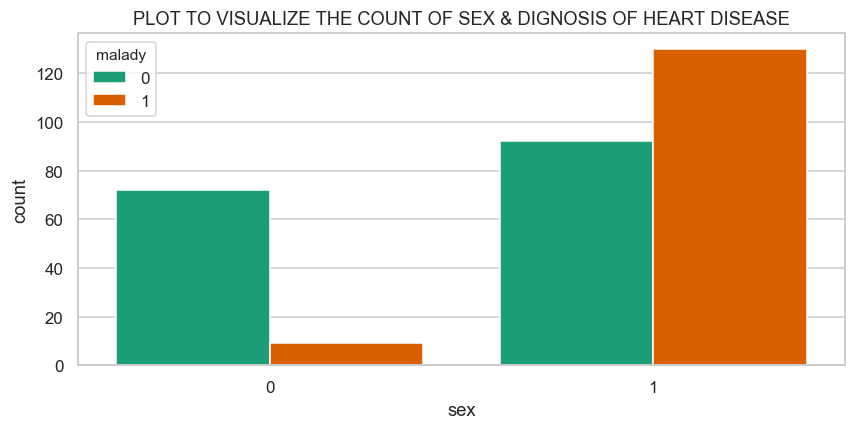

In [29]:
plt.figure(figsize=(9,4),dpi=110)
sns.set_context('talk',font_scale=0.9)
sns.set(style='whitegrid')
sns.countplot(x='sex',hue='malady',data=hrt,orient='v',palette='Dark2',saturation=18)
plt.title('PLOT TO VISUALIZE THE COUNT OF SEX & DIGNOSIS OF HEART DISEASE')
plt.show()
          

                           THE COUNT OF MALE (1) IS HIGHER AS COMPARED TO FEMALE(0) 

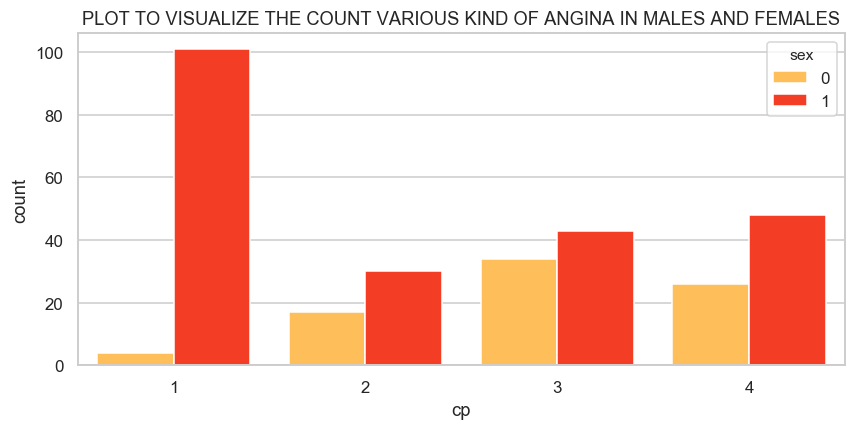

In [30]:
plt.figure(figsize=(9,4),dpi=110)
sns.set_context('talk',font_scale=0.9)
sns.set(style='whitegrid')
sns.countplot(x='cp',hue='sex',data=hrt,orient='v',palette='YlOrRd',saturation=18)
plt.title('PLOT TO VISUALIZE THE COUNT VARIOUS KIND OF ANGINA IN MALES AND FEMALES')
plt.show()
         

                   THE COUNT OF TYPICAL ANGINA(1) TYPE CHEST PAIN & OTHERS TYPES ARE HIGH IN MALES

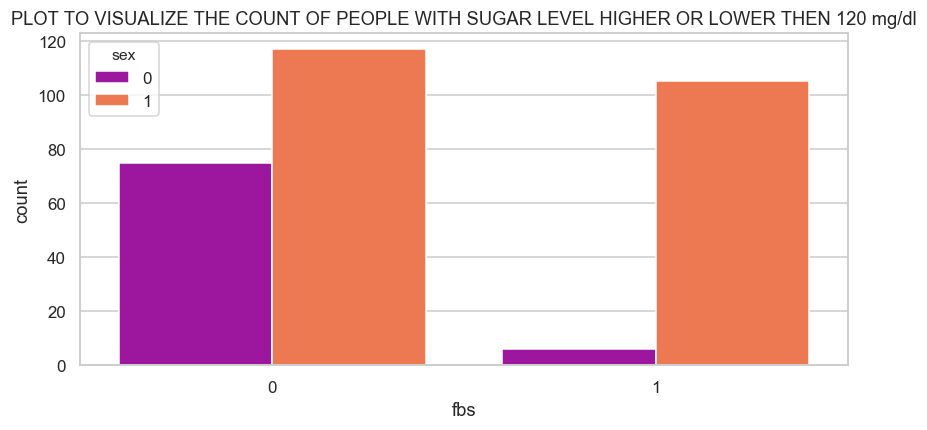

In [31]:
plt.figure(figsize=(9,4),dpi=110)
sns.set_context('talk',font_scale=0.9)
sns.set(style='whitegrid')
sns.countplot(x='fbs',hue='sex',data=hrt,orient='v',palette='plasma',saturation=18)
plt.title('PLOT TO VISUALIZE THE COUNT OF PEOPLE WITH SUGAR LEVEL HIGHER OR LOWER THEN 120 mg/dl')
plt.show()
         

                            MALE POPULATION HAVE HIGH SUGAR PROBLEMS AS COMAPRED TO FEMALES 

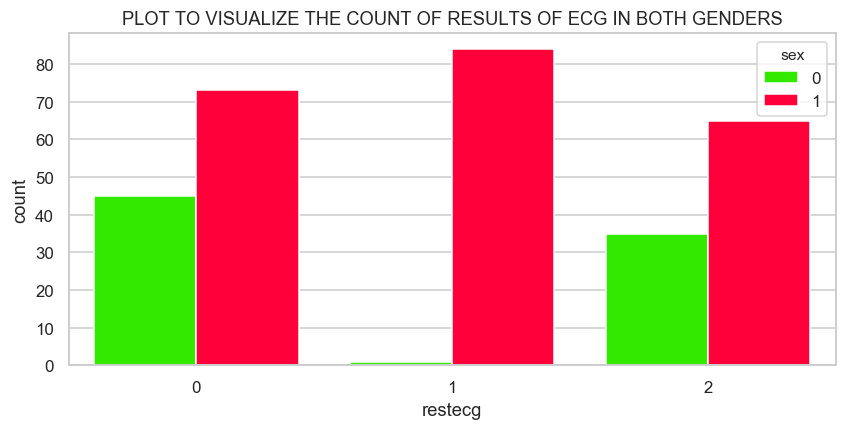

In [32]:
plt.figure(figsize=(9,4),dpi=110)
sns.set_context('talk',font_scale=0.9)
sns.set(style='whitegrid')
sns.countplot(x='restecg',data=hrt,orient='v',palette='prism',saturation=18,hue='sex')
plt.title('PLOT TO VISUALIZE THE COUNT OF RESULTS OF ECG IN BOTH GENDERS')
plt.show()
         

                                MAXIMUM MALE HAVE A ST-T WAVES ABNORMALITY ECG RESULT

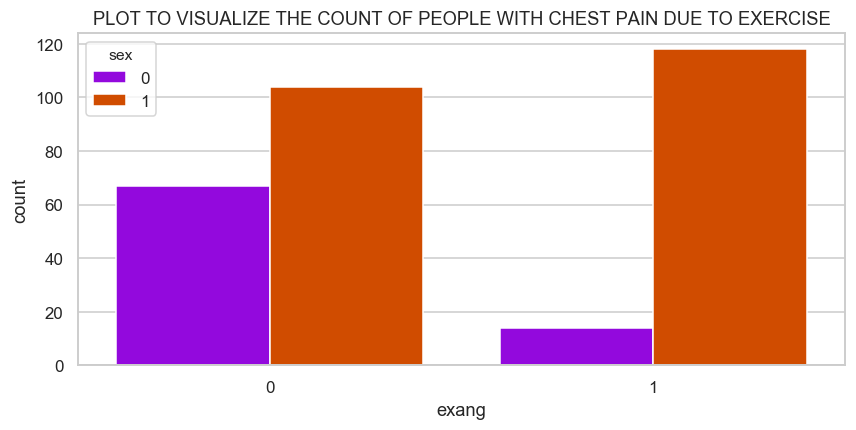

In [33]:
plt.figure(figsize=(9,4),dpi=110)
sns.set_context('talk',font_scale=0.9)
sns.set(style='whitegrid')
sns.countplot(x='exang',hue='sex',data=hrt,orient='v',palette='gnuplot',saturation=18)
plt.title('PLOT TO VISUALIZE THE COUNT OF PEOPLE WITH CHEST PAIN DUE TO EXERCISE')
plt.show()
         

                             A LERGE NUMBER OF MALES HAVE CHEST PAIN DUE TO EXERCISE

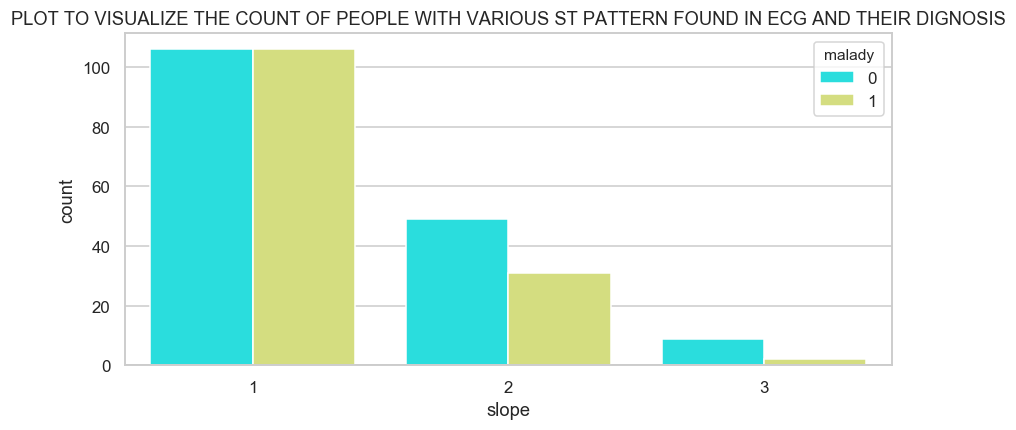

In [34]:
plt.figure(figsize=(9,4),dpi=110)
sns.set_context('talk',font_scale=0.9)
sns.set(style='whitegrid')
sns.countplot(x='slope',hue='malady',data=hrt,orient='v',palette='rainbow',saturation=18)
plt.title('PLOT TO VISUALIZE THE COUNT OF PEOPLE WITH VARIOUS ST PATTERN FOUND IN ECG AND THEIR DIGNOSIS')
plt.show()
         

NUMBERS OF UNSLOPPING ST PATTERN IS HIGH AS COMPARED TO FLAT(2) & DOWNSLOPPING(3) ST AND NUMBERS OF  POSITIVE CASES OF HEART DISEASE IS ALSO HIUGH IN THIS CASE

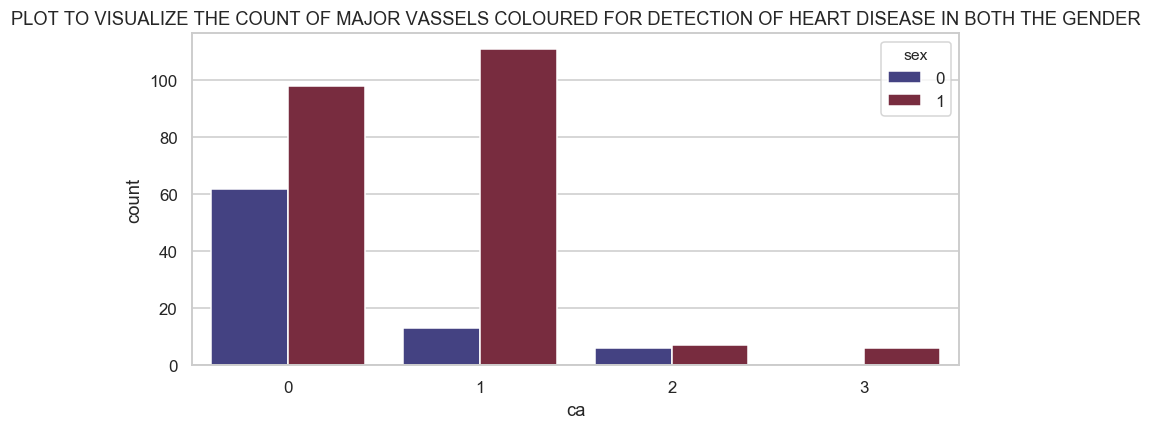

In [35]:
plt.figure(figsize=(9,4),dpi=110)
sns.set_context('talk',font_scale=0.9)
sns.set(style='whitegrid')
sns.countplot(x='ca',data=hrt,orient='v',palette='icefire',saturation=18,hue='sex')
plt.title('PLOT TO VISUALIZE THE COUNT OF MAJOR VASSELS COLOURED FOR DETECTION OF HEART DISEASE IN BOTH THE GENDER')
plt.show()
         

                PLOT IS SHOWING THAT MAXIUM 1 MAJOR VESSELS WERE COLOURED BY FLOUROSCOPY IN MALES

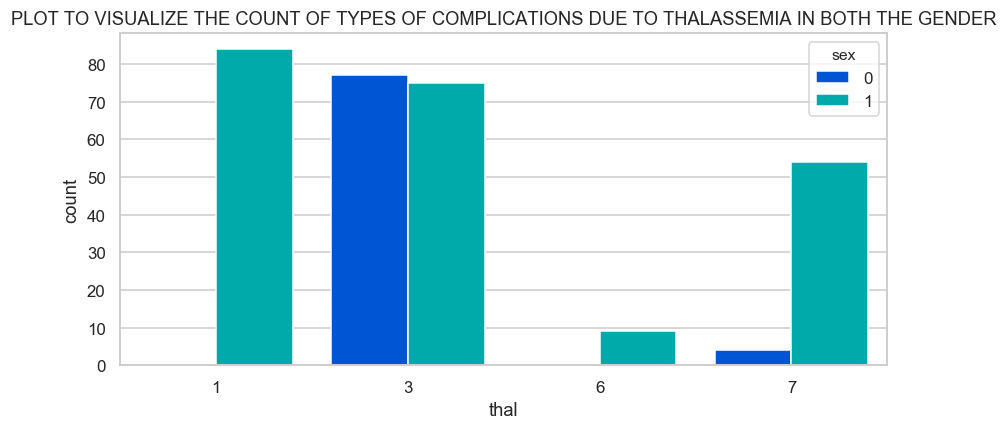

In [36]:
plt.figure(figsize=(9,4),dpi=110)
sns.set_context('talk',font_scale=0.9)
sns.set(style='whitegrid')
sns.countplot(x='thal',hue='sex',data=hrt,orient='v',palette='winter',saturation=18)
plt.title('PLOT TO VISUALIZE THE COUNT OF TYPES OF COMPLICATIONS DUE TO THALASSEMIA IN BOTH THE GENDER')
plt.show()

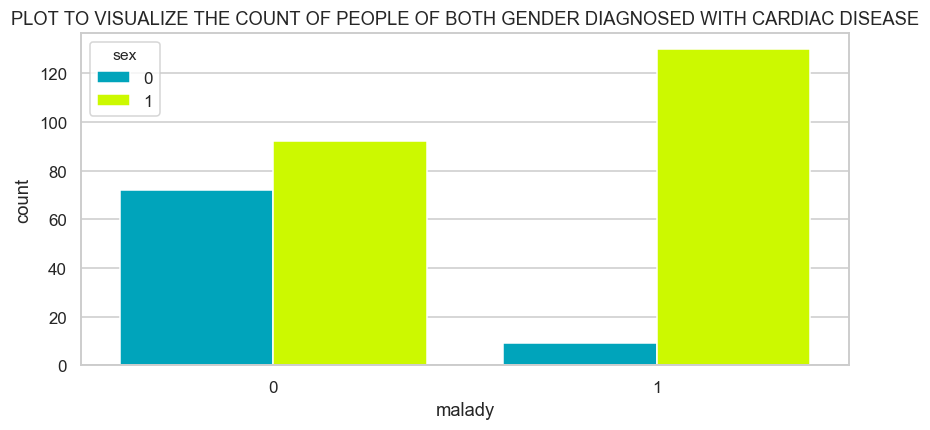

In [37]:
plt.figure(figsize=(9,4),dpi=110)
sns.set_context('talk',font_scale=0.9)
sns.set(style='whitegrid')
sns.countplot(x='malady',hue="sex",data=hrt,orient='v',palette='nipy_spectral',saturation=18)
plt.title('PLOT TO VISUALIZE THE COUNT OF PEOPLE OF BOTH GENDER DIAGNOSED WITH CARDIAC DISEASE')
plt.show()

                                MALES HAVE HIGH RATE OF POSITIVE CASES

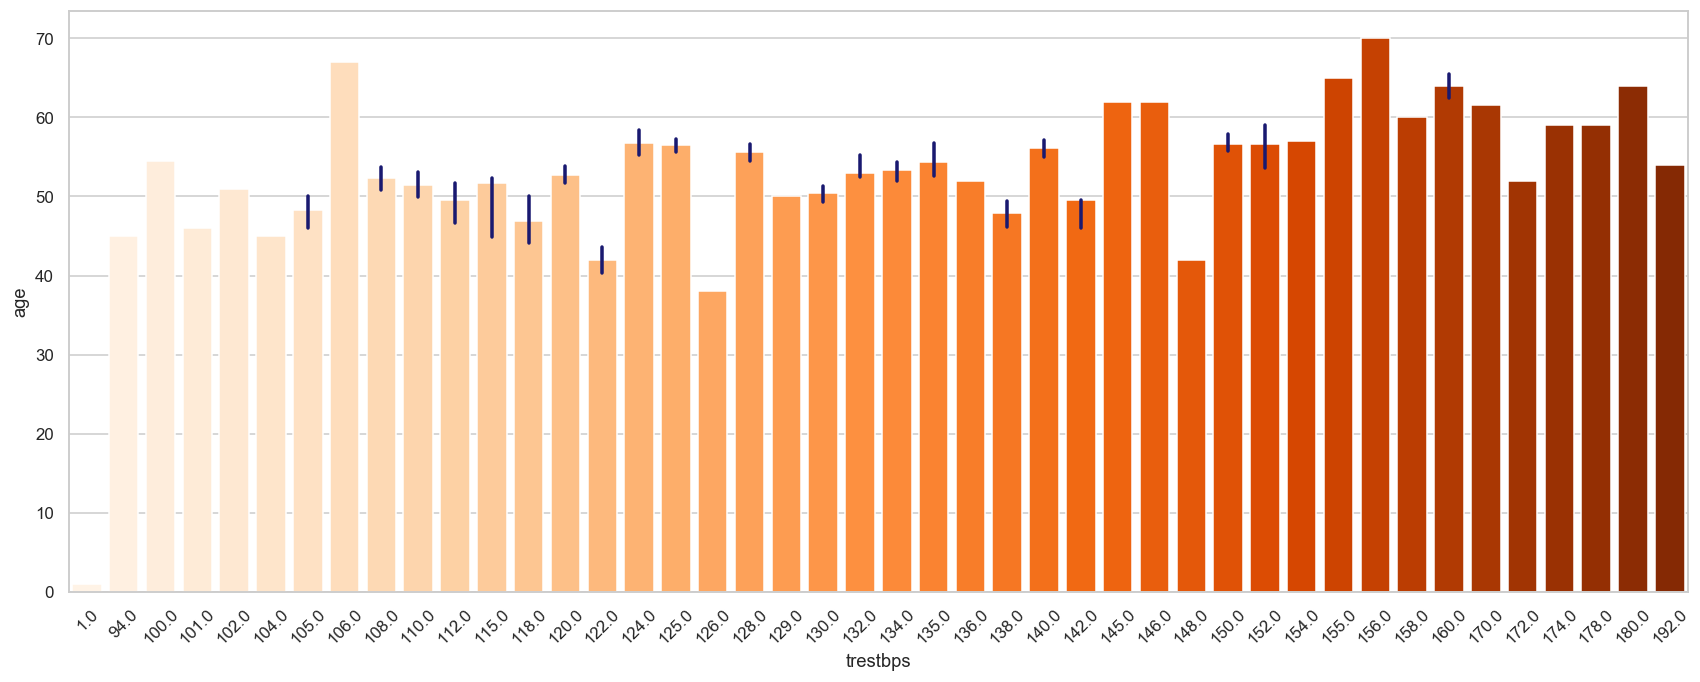

In [38]:
plt.figure(figsize=(19,7),dpi=110)
sns.set_context('talk',font_scale=1.2)
sns.set(style='whitegrid')
m1=sns.barplot(x='trestbps',y='age',data=hrt,ci=45,orient='v',palette='Oranges',saturation=25,errcolor='midnightblue',errwidth=2.3)
m1.set_xticklabels(m1.get_xticklabels(),rotation=45)
plt.show()

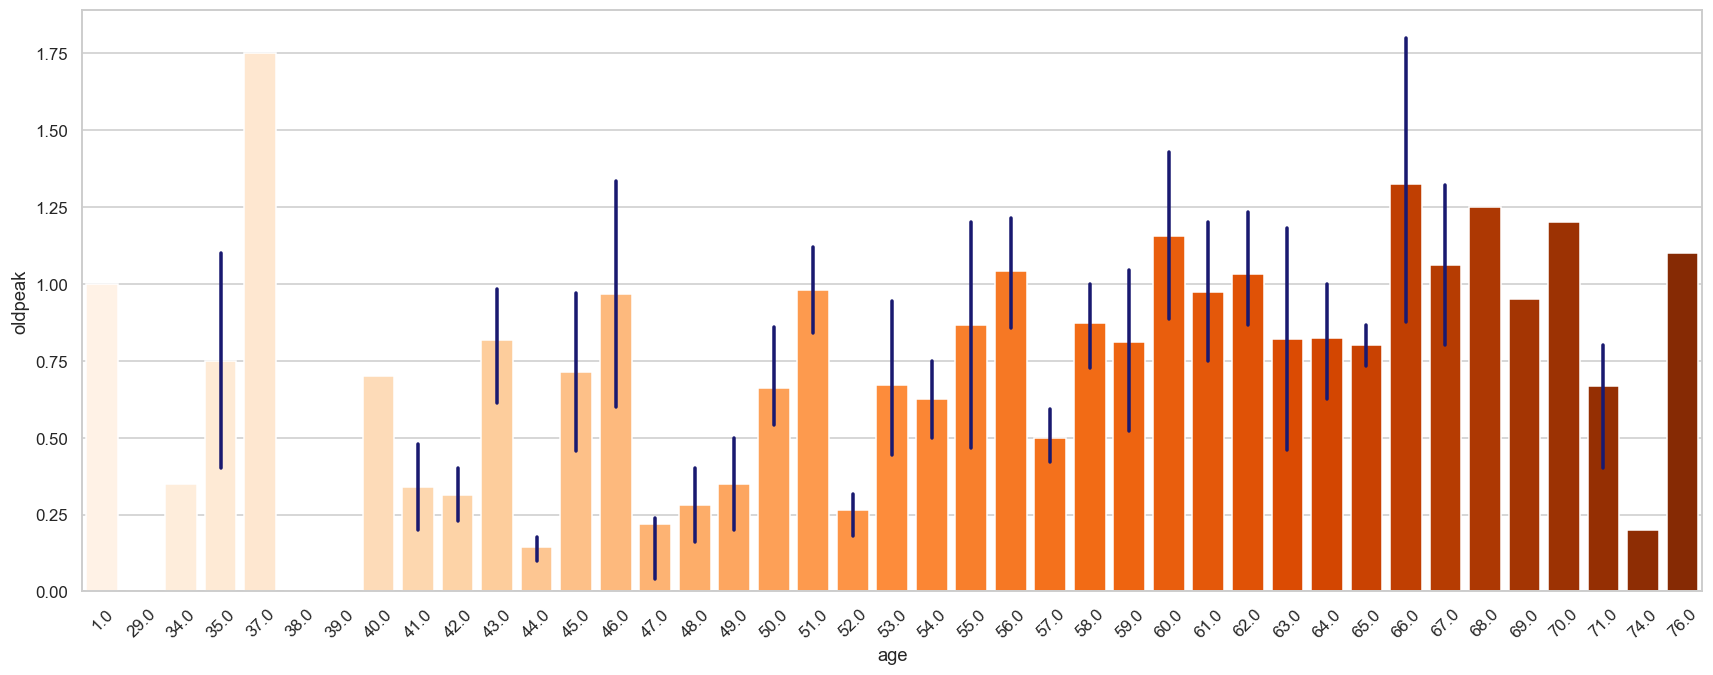

In [39]:
plt.figure(figsize=(19,7),dpi=110)
sns.set_context('talk',font_scale=1.2)
sns.set(style='whitegrid')
m1=sns.barplot(x='age',y='oldpeak',data=hrt,ci=45,orient='v',palette='Oranges',saturation=25,errcolor='midnightblue',errwidth=2.3)
m1.set_xticklabels(m1.get_xticklabels(),rotation=45)
plt.show()

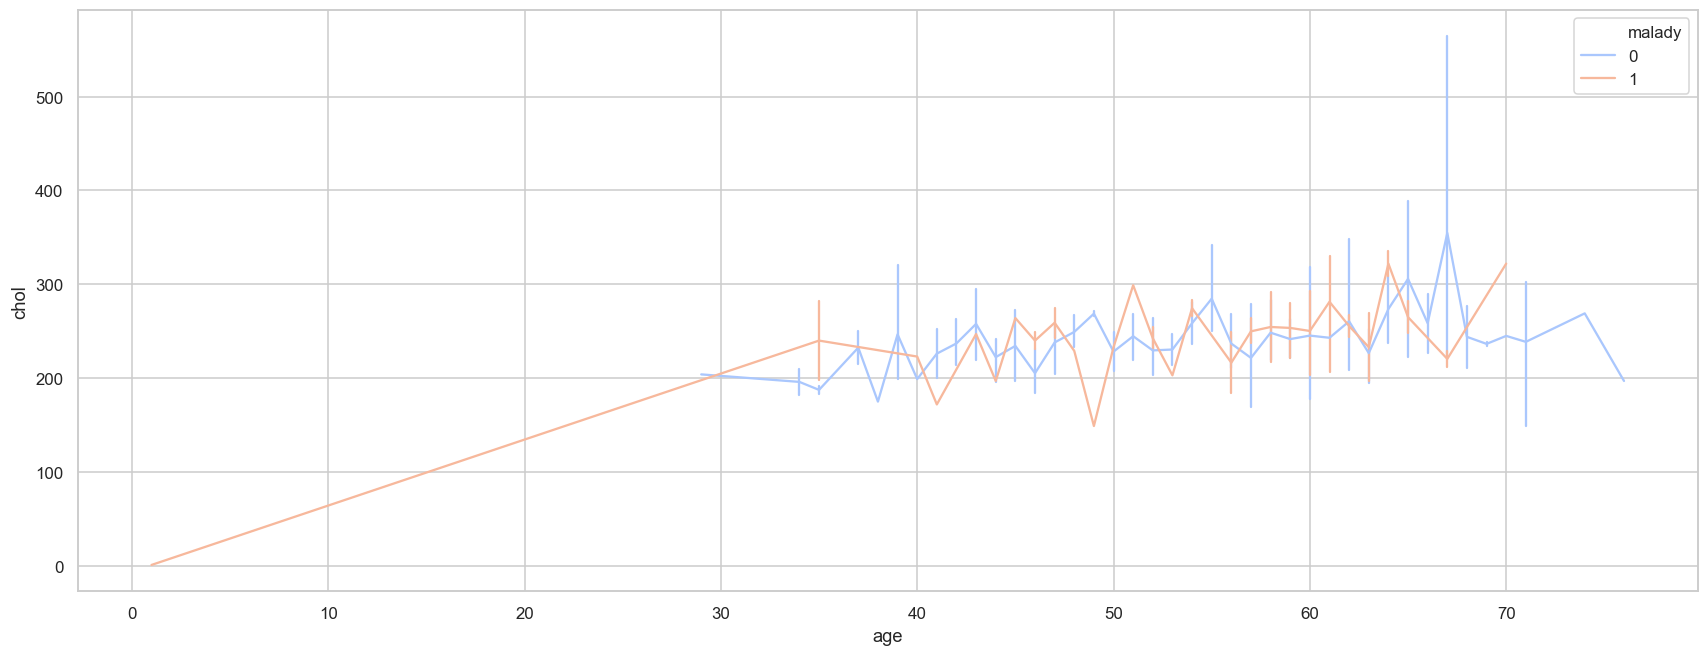

In [40]:
plt.figure(figsize=(19,7),dpi=110)
sns.set_context('talk',font_scale=1.2)
sns.set(style='whitegrid')
sns.lineplot(x='age',y='chol',hue='malady',data=hrt,palette='coolwarm',dashes=True, markers='2',estimator='mean',ci=95,sort=True,err_style='bars',legend='brief')

                            THE CHOLESTROL LEVEL INCREASES WITH INCREASE IN AGE

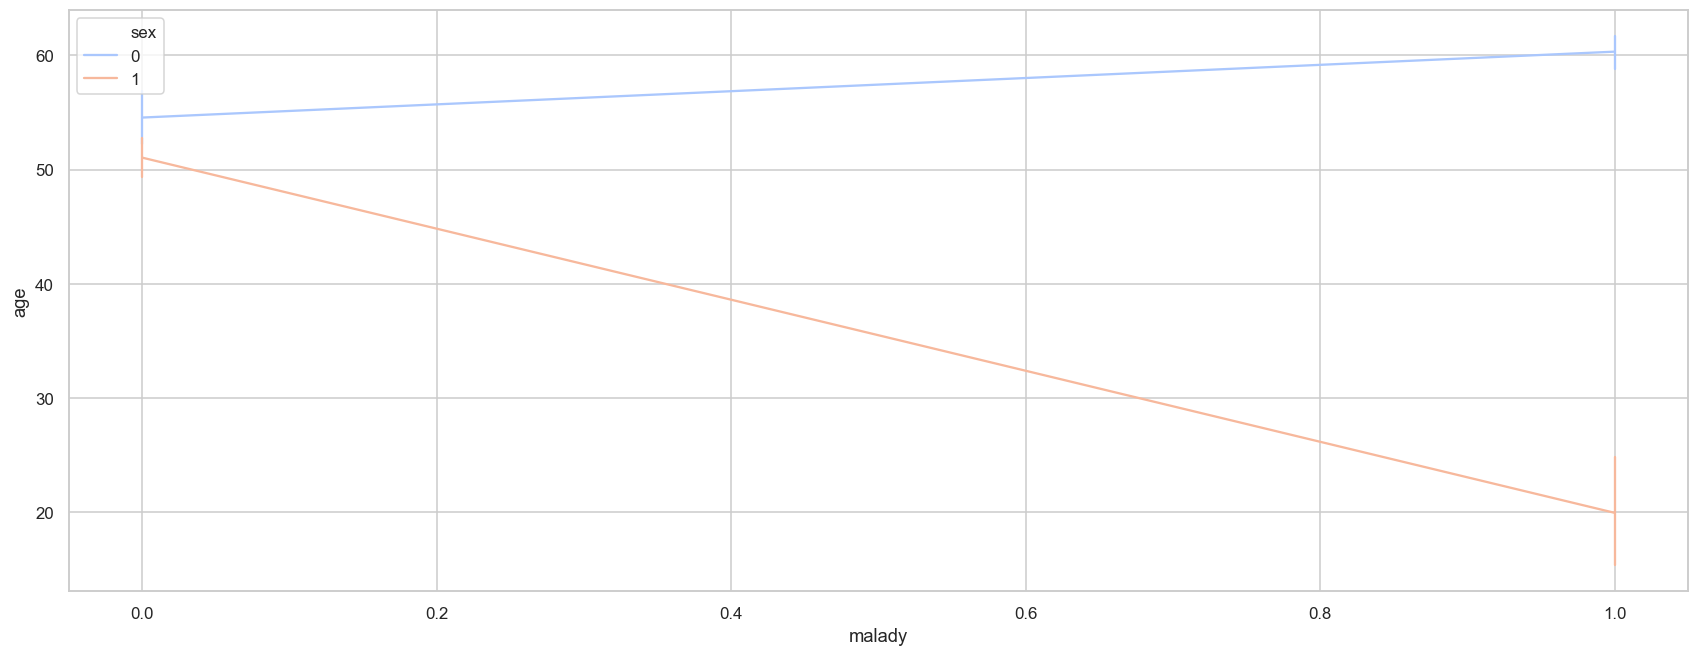

In [41]:
plt.figure(figsize=(19,7),dpi=110)
sns.set_context('talk',font_scale=1.2)
sns.set(style='whitegrid')
sns.lineplot(x='malady',y='age',hue='sex',data=hrt,palette='coolwarm',dashes=True, markers='2',estimator='mean',ci=95,sort=True,err_style='bars',legend='brief')

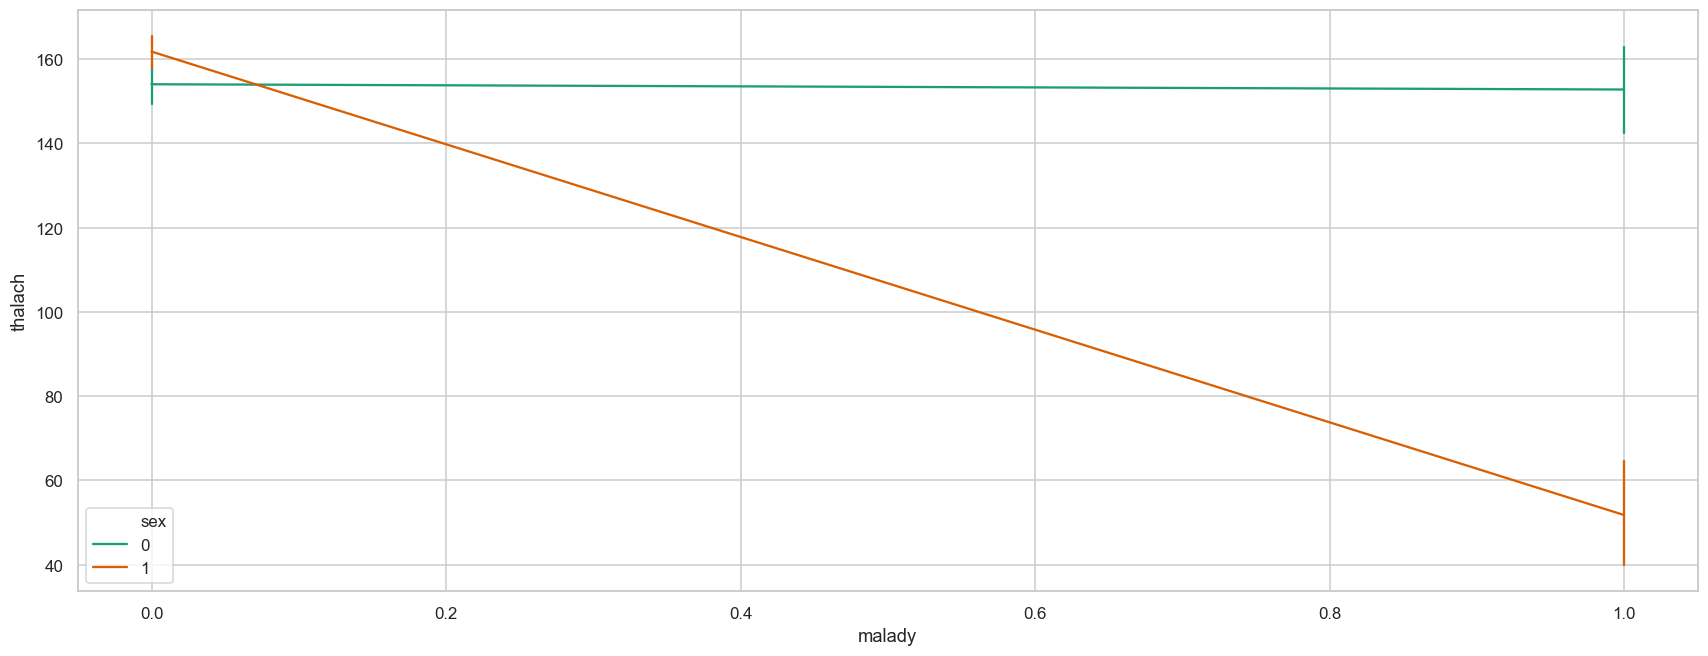

In [42]:
plt.figure(figsize=(19,7),dpi=110)
sns.set_context('talk',font_scale=1.2)
sns.set(style='whitegrid')
sns.lineplot(y='thalach',x='malady',hue='sex',data=hrt,palette='Dark2',dashes=True, markers='2',estimator='mean',ci=95,sort=True,err_style='bars',legend='brief')

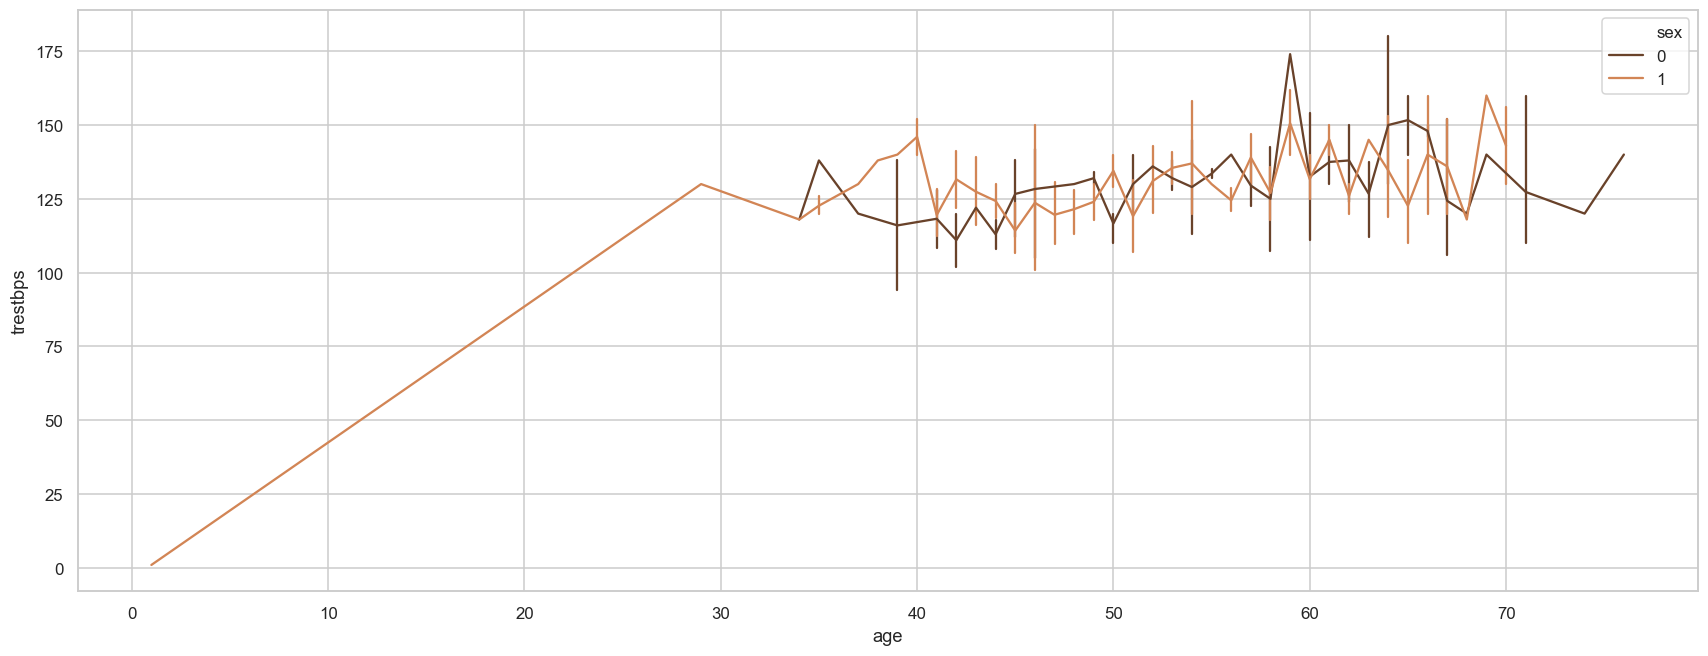

In [43]:
plt.figure(figsize=(19,7),dpi=110)
sns.set_context('talk',font_scale=1.2)
sns.set(style='whitegrid')
sns.lineplot(x='age',y='trestbps',hue='sex',data=hrt,palette='copper',
             dashes=True, markers='2',estimator='mean',ci=95,sort=True,err_style='bars',legend='brief')

                                AFTER 40 THE BP VALUE GOES HIGH FOR BOTH GENDER

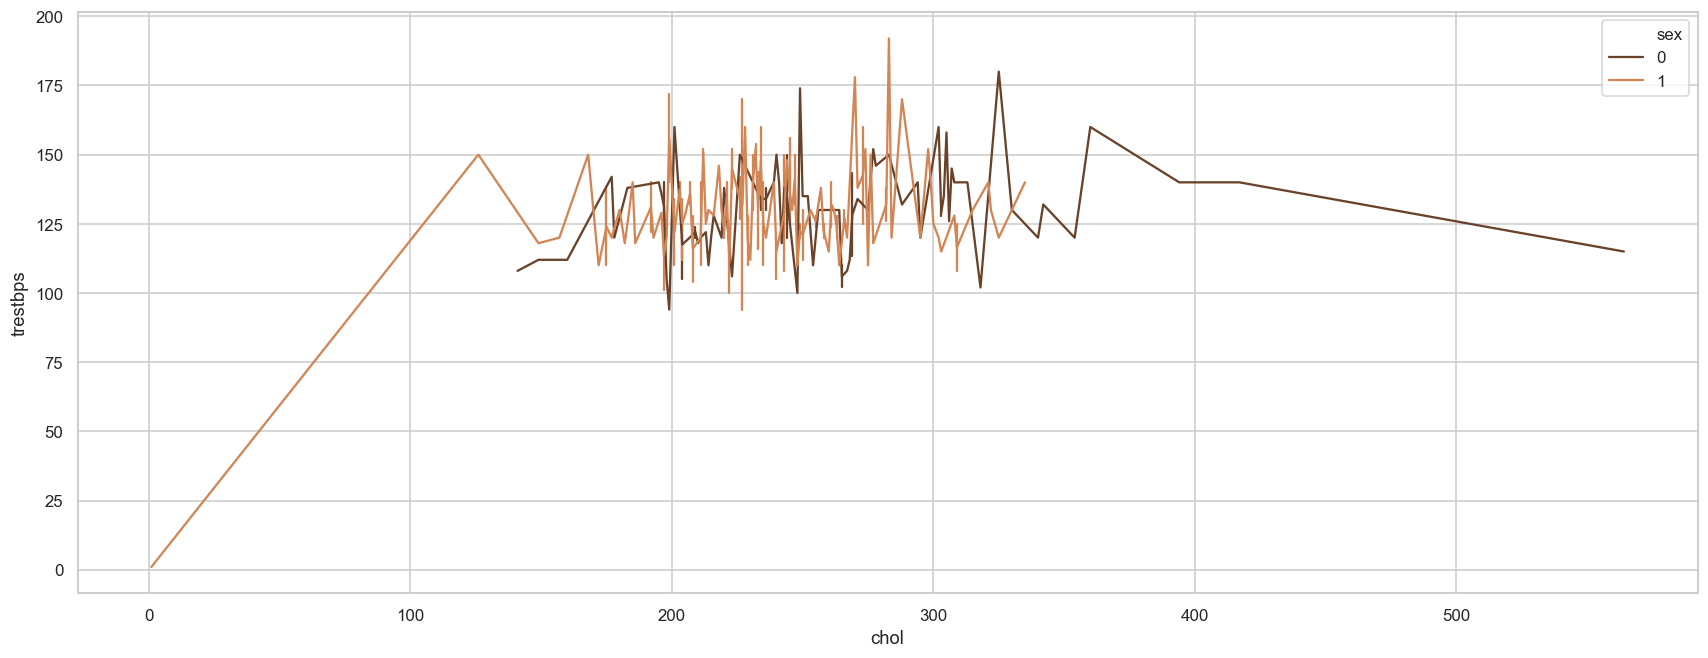

In [44]:
plt.figure(figsize=(19,7),dpi=110)
sns.set_context('talk',font_scale=1.2)
sns.set(style='whitegrid')
sns.lineplot(x='chol',y='trestbps',hue='sex',data=hrt,palette='copper',
             dashes=True, markers='2',estimator='mean',ci=95,sort=True,err_style='bars',legend='brief')

                            A CHOL LEVEL OF 200 TO 300 EXECUTES A HIGH BP VALUE

In [45]:
cl=hrt.columns.values
cl

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'malady'],
      dtype=object)

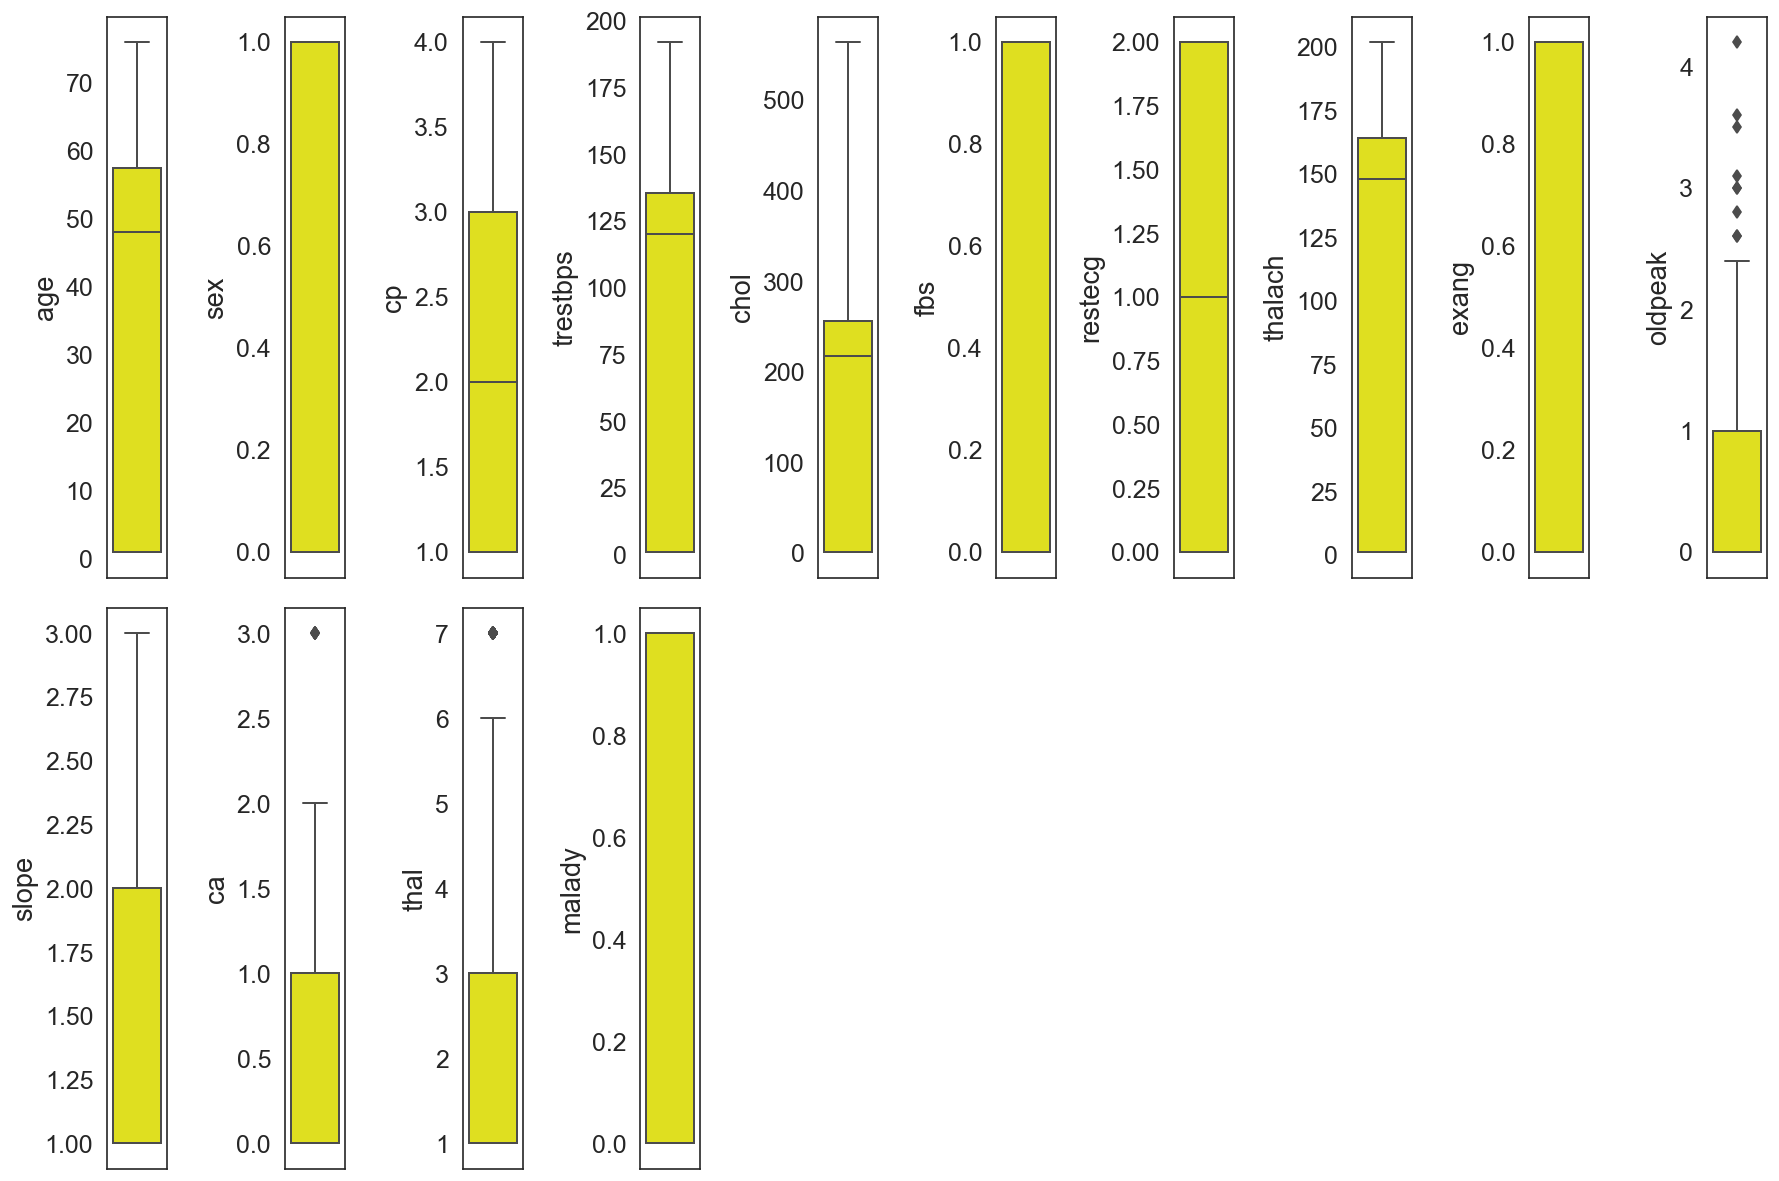

In [46]:
#boxplot to visualize outliers
sns.set(style='white')
sns.set_context("paper",font_scale=1.7)
plt.figure(figsize=(15,20),dpi=120)
for i in range (0,14):
    plt.subplot(4,10,i+1)
    sns.boxplot(hrt[cl[i]], color='yellow' ,orient='v')
plt.tight_layout()

In [47]:
z=np.abs(zscore(hrt))
z

array([[0.98098396, 0.60404045, 1.17123748, ..., 0.82501759, 1.29457932,
        0.92063075],
       [1.53145839, 0.60404045, 1.17123748, ..., 0.66296057, 1.10308287,
        1.08621182],
       [1.14307701, 0.60404045, 1.3456771 , ..., 2.15093873, 1.77411176,
        1.08621182],
       ...,
       [1.53145839, 0.60404045, 1.17123748, ..., 0.66296057, 1.10308287,
        1.08621182],
       [0.73784437, 1.65551827, 0.33226595, ..., 0.66296057, 0.14401799,
        1.08621182],
       [0.03209763, 0.60404045, 0.50670558, ..., 0.82501759, 0.14401799,
        0.92063075]])

In [48]:
print(np.where(z>3))

(array([  0,   3,   3,   9,   9,  16,  27,  49,  58,  61,  62,  66,  69,
        80,  92, 152, 155, 176, 179, 183, 183, 186, 232, 289], dtype=int64), array([10,  9, 10,  9, 10, 10, 10, 10, 10, 10, 11,  9,  9,  9, 11,  4, 11,
       11, 11,  9, 10, 10, 11, 10], dtype=int64))


In [49]:
#checking few outlier values
print(z[0][10],'\n',z[289][10],'\n',z[61][10])

3.0577480801326278 
 3.0577480801326278 
 3.0577480801326278


In [50]:
h=hrt[(z<3).all(axis=1)]
print(' Before outlier treatment the shape was:',hrt.shape,'\n After outlier removal the shape becomes: ',h.shape,
      '\n So a total of ',len(hrt)-len(h),' numbers of rows have been removed.')

 Before outlier treatment the shape was: (303, 14) 
 After outlier removal the shape becomes:  (282, 14) 
 So a total of  21  numbers of rows have been removed.


In [51]:
h

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,malady
1,1.0,1,1,1.0,1.0,1,1,1.0,1,1.0,1,1,1,1
2,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,2,2,7,1
4,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,1,0,3,0
5,56.0,1,2,120.0,236.0,0,0,178.0,0,0.8,1,0,3,0
6,1.0,1,1,1.0,1.0,1,1,1.0,1,1.0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1,1,110.0,264.0,0,0,132.0,0,1.2,2,0,7,1
299,1.0,1,1,1.0,1.0,1,1,1.0,1,1.0,1,1,1,1
300,1.0,1,1,1.0,1.0,1,1,1.0,1,1.0,1,1,1,1
301,57.0,0,2,130.0,236.0,0,2,174.0,0,0.0,2,1,3,1


In [54]:
cl=h.columns.values
cl

array(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'malady'],
      dtype=object)

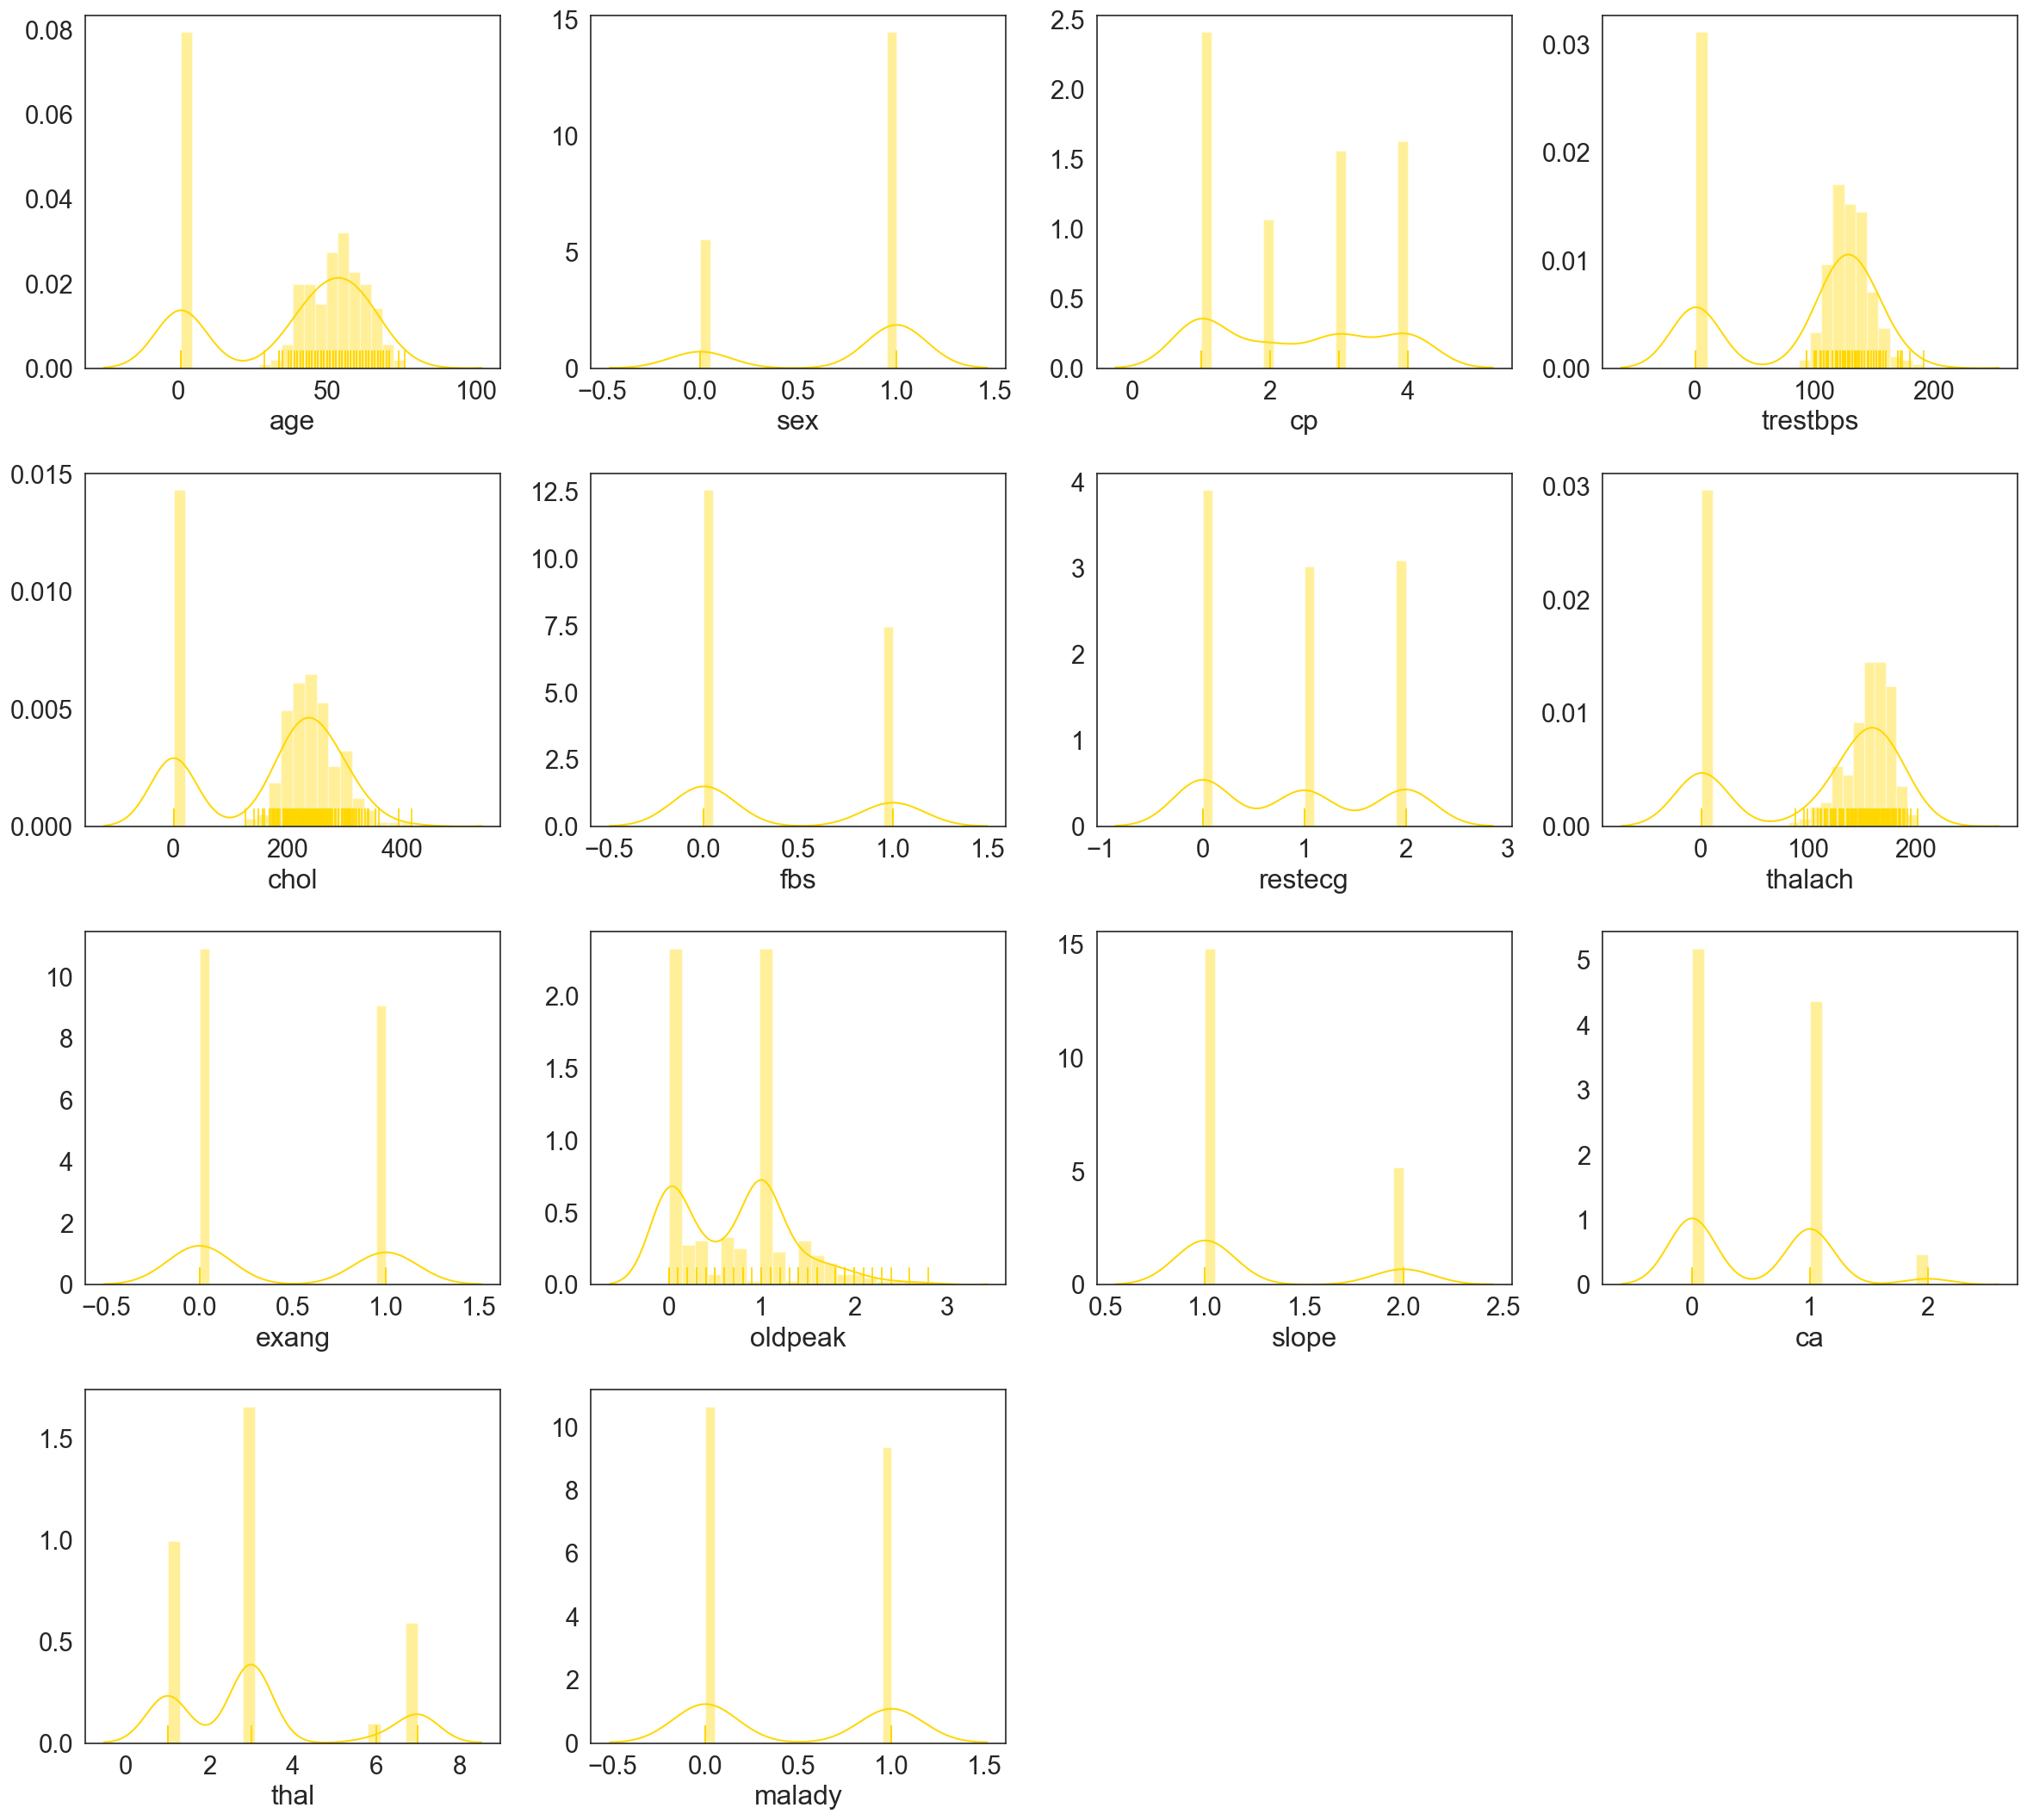

In [55]:
#Distplot to visualize spread 
sns.set(style='white')
sns.set_context("paper",font_scale=2)
plt.figure(figsize=(20,18),dpi=120)
for i in range (0,14):
    plt.subplot(4,4,i+1)
    sns.distplot(h[cl[i]], color='gold',kde=True,hist=True,rug=True,bins=20)
plt.tight_layout()

In [56]:
#checking skewness
h.skew()

age        -0.588007
sex        -1.004218
cp          0.125173
trestbps   -0.709295
chol       -0.525349
fbs         0.530971
restecg     0.154209
thalach    -0.716552
exang       0.186178
oldpeak     0.513363
slope       1.106940
ca          0.586222
thal        0.827177
malady      0.128606
dtype: float64

In [57]:
#skew of 0.55 is allowable so any attribute having skew value more than 0.55 will be treated as skewed data and must be removed.
for s in h.columns:
    if h.skew().loc[s]>0.55:
        h[s]=np.log1p(h[s])        
        
print(h.skew())

age        -0.588007
sex        -1.004218
cp          0.125173
trestbps   -0.709295
chol       -0.525349
fbs         0.530971
restecg     0.154209
thalach    -0.716552
exang       0.186178
oldpeak     0.513363
slope       1.106940
ca          0.257635
thal        0.110843
malady      0.128606
dtype: float64


In [58]:
#checking Co_relations
h_corr=h.corr()
h_corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,malady
age,1.000000,-0.428297,0.715982,0.945181,0.922860,-0.781941,-0.023651,0.891984,-0.655607,-0.235075,0.414236,-0.481548,0.819741,-0.629391
sex,-0.428297,1.000000,-0.348287,-0.387230,-0.437009,0.377864,0.044204,-0.379393,0.356740,0.200791,-0.213721,0.252206,-0.120973,0.437074
cp,0.715982,-0.348287,1.000000,0.704404,0.712493,-0.677531,-0.059185,0.674305,-0.381155,-0.189178,0.347656,-0.414204,0.673763,-0.394780
trestbps,0.945181,-0.387230,0.704404,1.000000,0.932018,-0.807528,-0.036313,0.947305,-0.695637,-0.305422,0.368076,-0.571167,0.831856,-0.656630
chol,0.922860,-0.437009,0.712493,0.932018,1.000000,-0.797683,-0.002605,0.917517,-0.660465,-0.294015,0.345216,-0.530709,0.786283,-0.629215
fbs,-0.781941,0.377864,-0.677531,-0.807528,-0.797683,1.000000,0.084337,-0.821986,0.594351,0.266049,-0.337966,0.530379,-0.724737,0.556434
restecg,-0.023651,0.044204,-0.059185,-0.036313,-0.002605,0.084337,1.000000,-0.071890,0.072266,0.075459,0.096879,0.069249,-0.052884,0.143240
thalach,0.891984,-0.379393,0.674305,0.947305,0.917517,-0.821986,-0.071890,1.000000,-0.753143,-0.382315,0.287823,-0.609465,0.786502,-0.716555
exang,-0.655607,0.356740,-0.381155,-0.695637,-0.660465,0.594351,0.072266,-0.753143,1.000000,0.388599,-0.116019,0.507851,-0.492142,0.672101
oldpeak,-0.235075,0.200791,-0.189178,-0.305422,-0.294015,0.266049,0.075459,-0.382315,0.388599,1.000000,0.221272,0.336149,-0.174861,0.360247


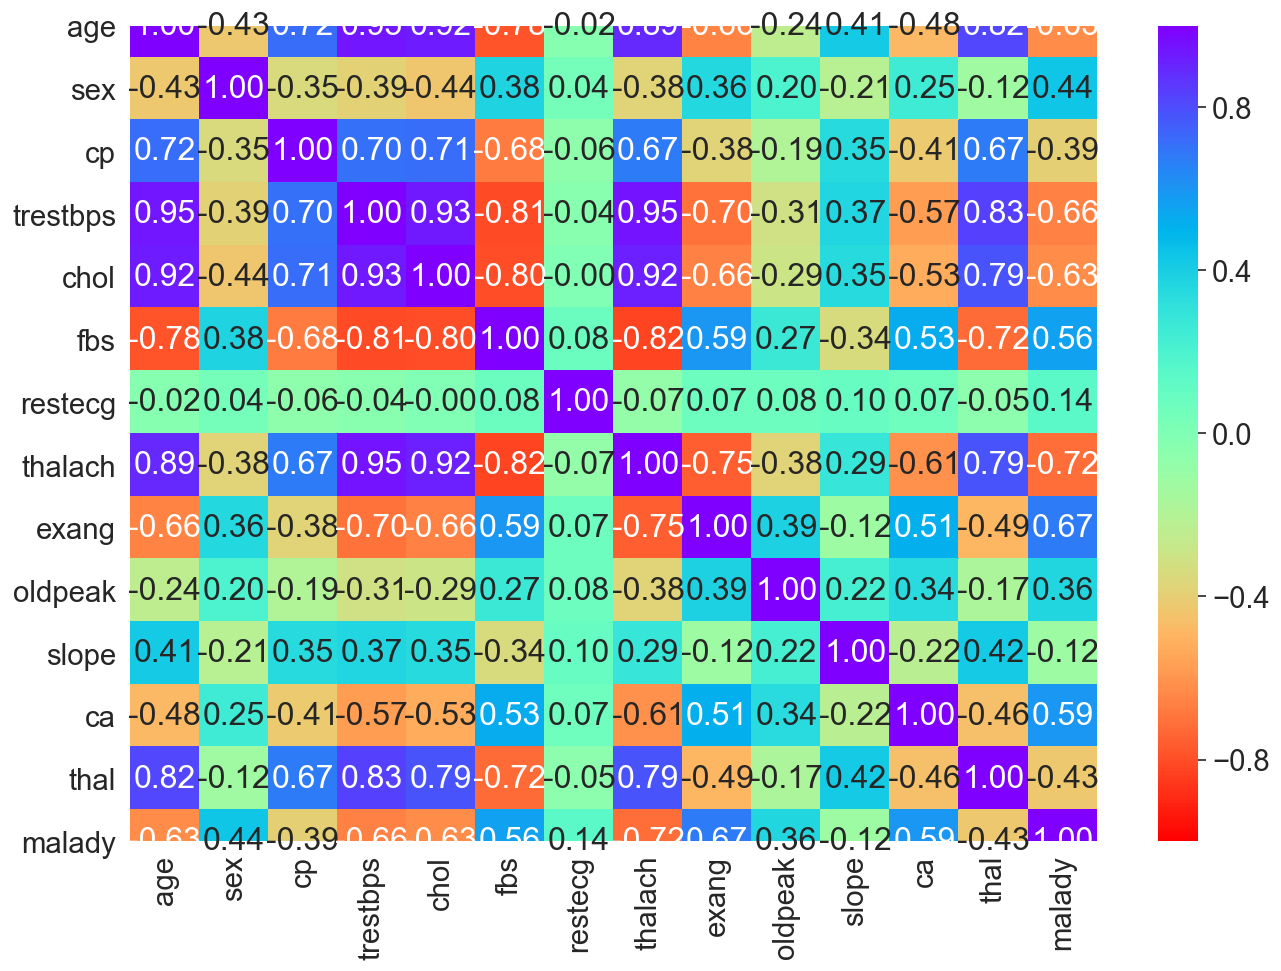

In [59]:
#heatmap
#scatterplot
plt.figure(dpi=120,figsize=(13,9))
sns.heatmap(h_corr,annot=True,cmap='rainbow_r',vmax=1,vmin=-1,fmt='.2f')
plt.show()

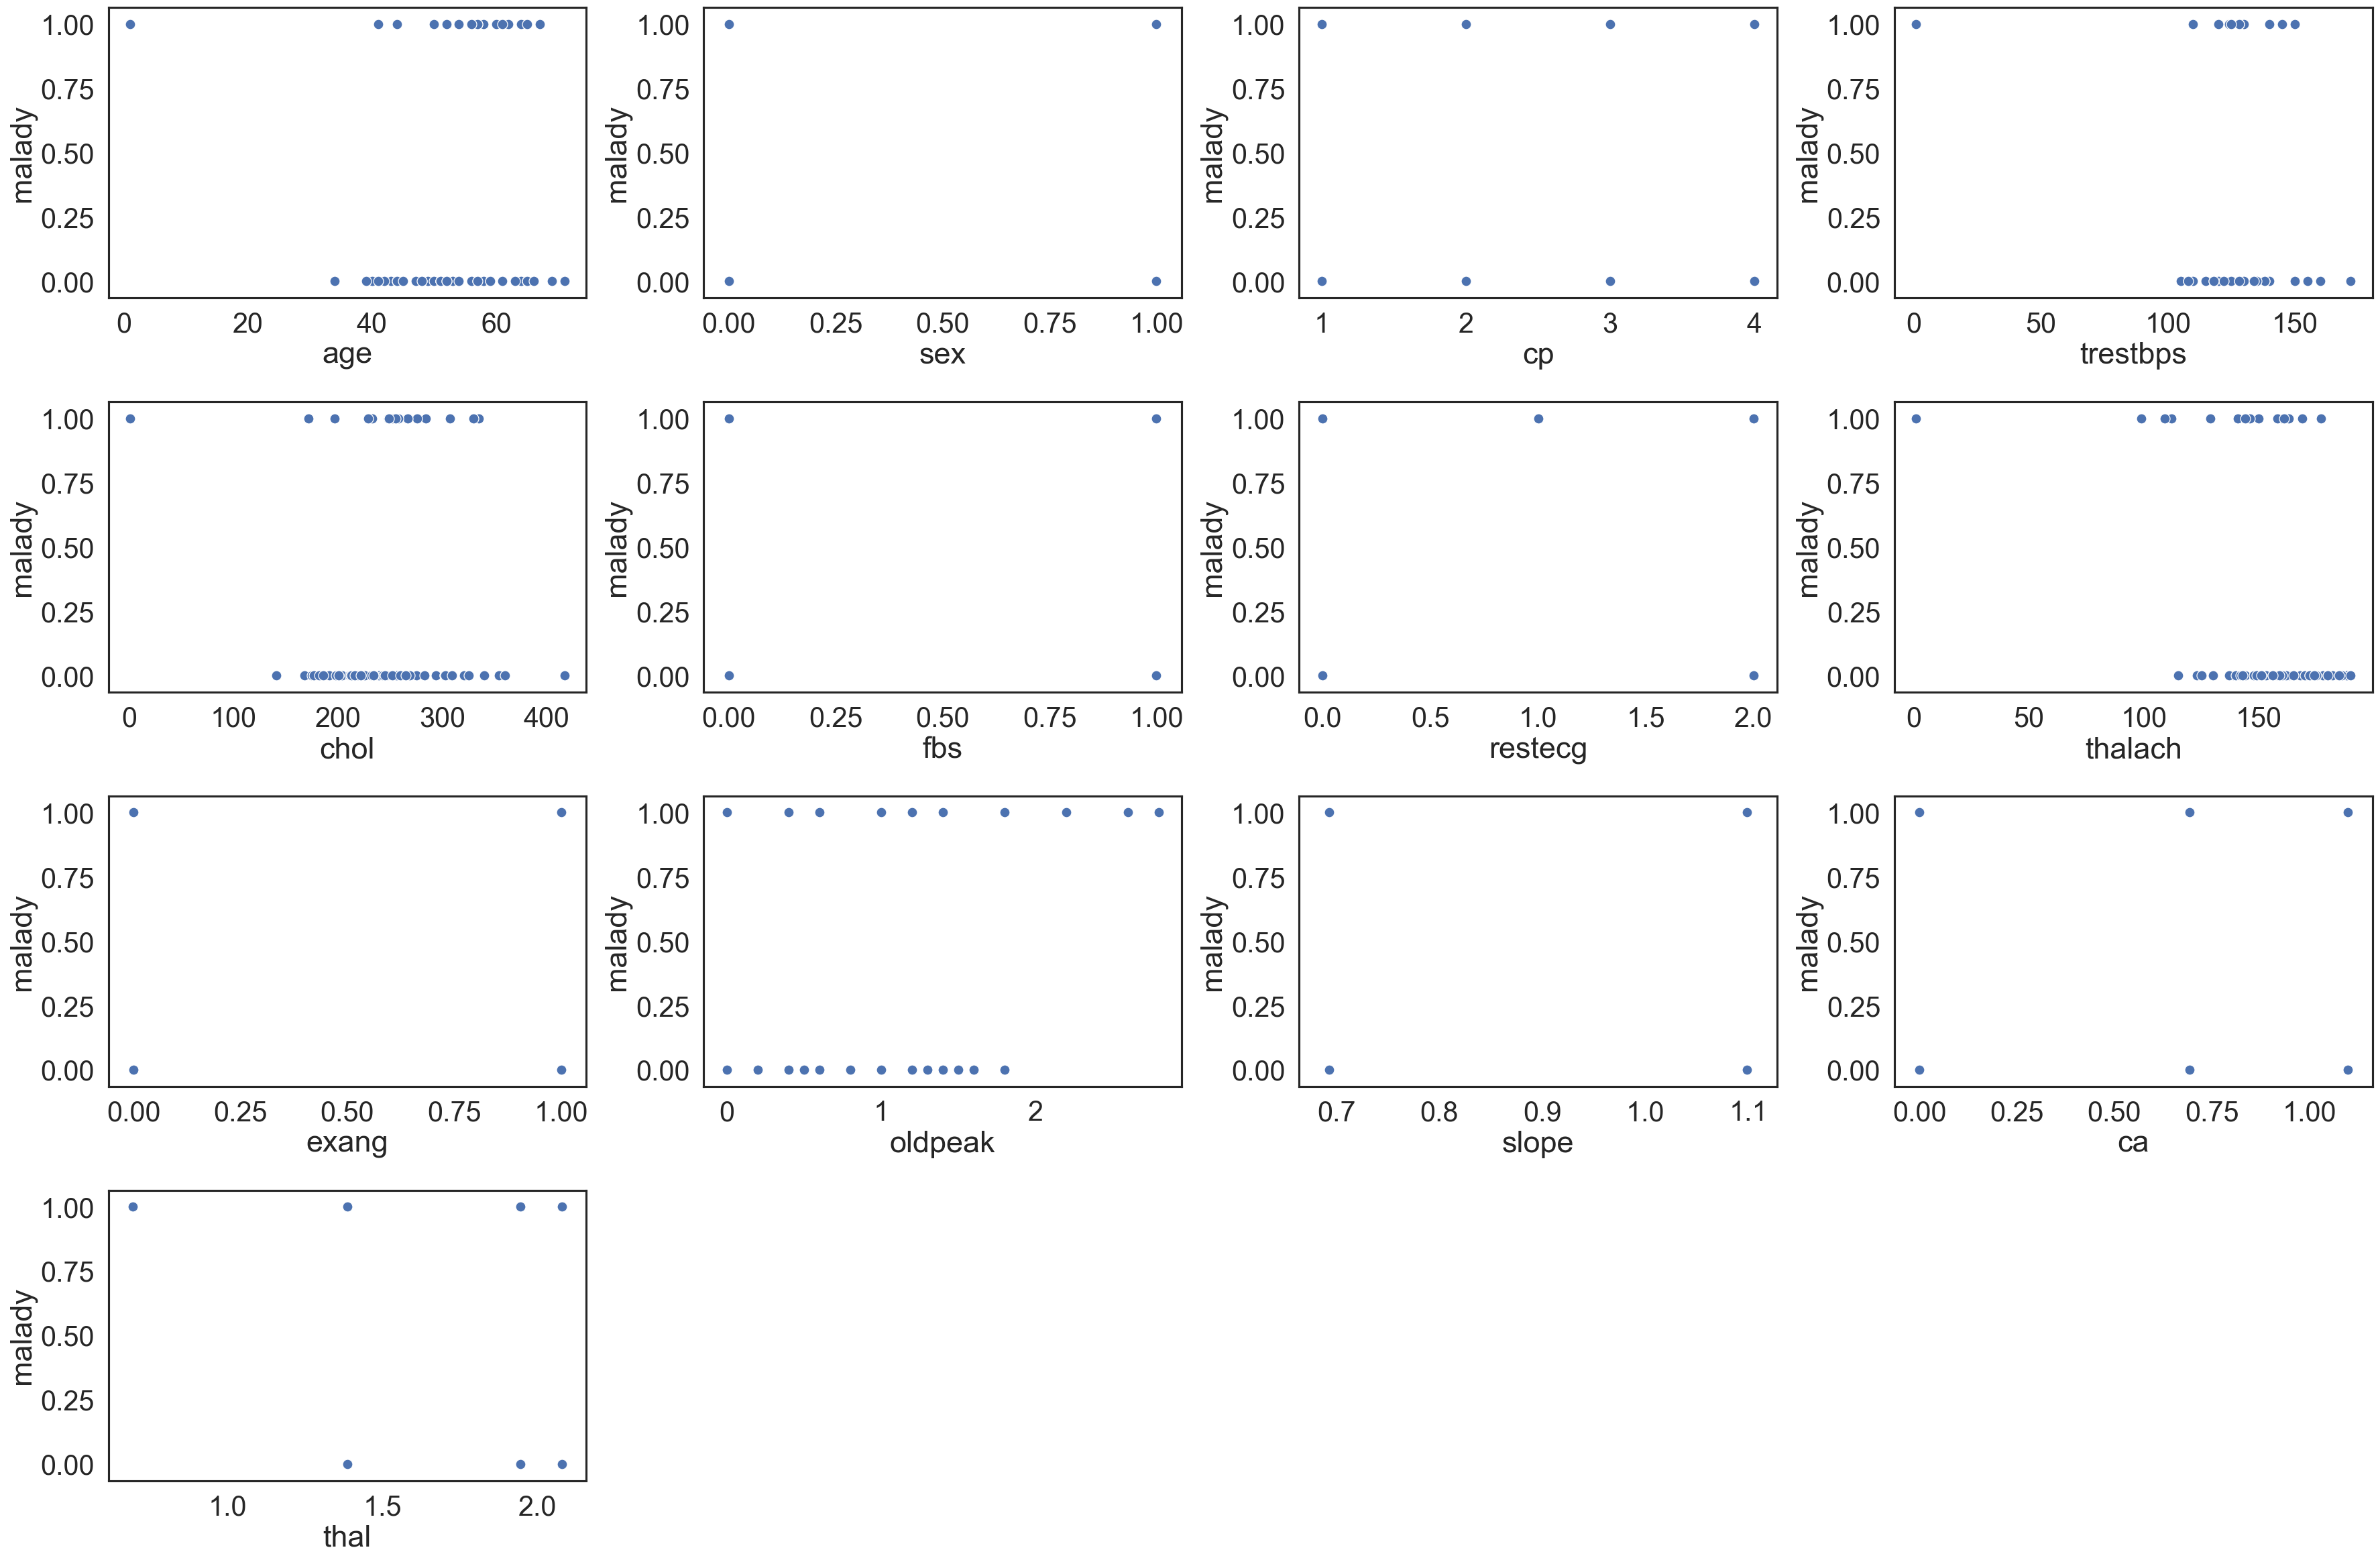

In [60]:
#scatterplot
sns.set(style='white')
plt.figure(dpi=120,figsize=(30,20))
sns.set_context('talk',font_scale=1.5)
for i in range (0,13):
    plt.subplot(4,4,i+1)
    sns.scatterplot(x=(h[cl[i]]).head(100), y=(h['malady']).head(100),ci=80,palette='gnuplot') 
plt.tight_layout()
#taking and plotting the scatter plot for the first 100 rows of attributes vs region

<Figure size 1200x300 with 0 Axes>

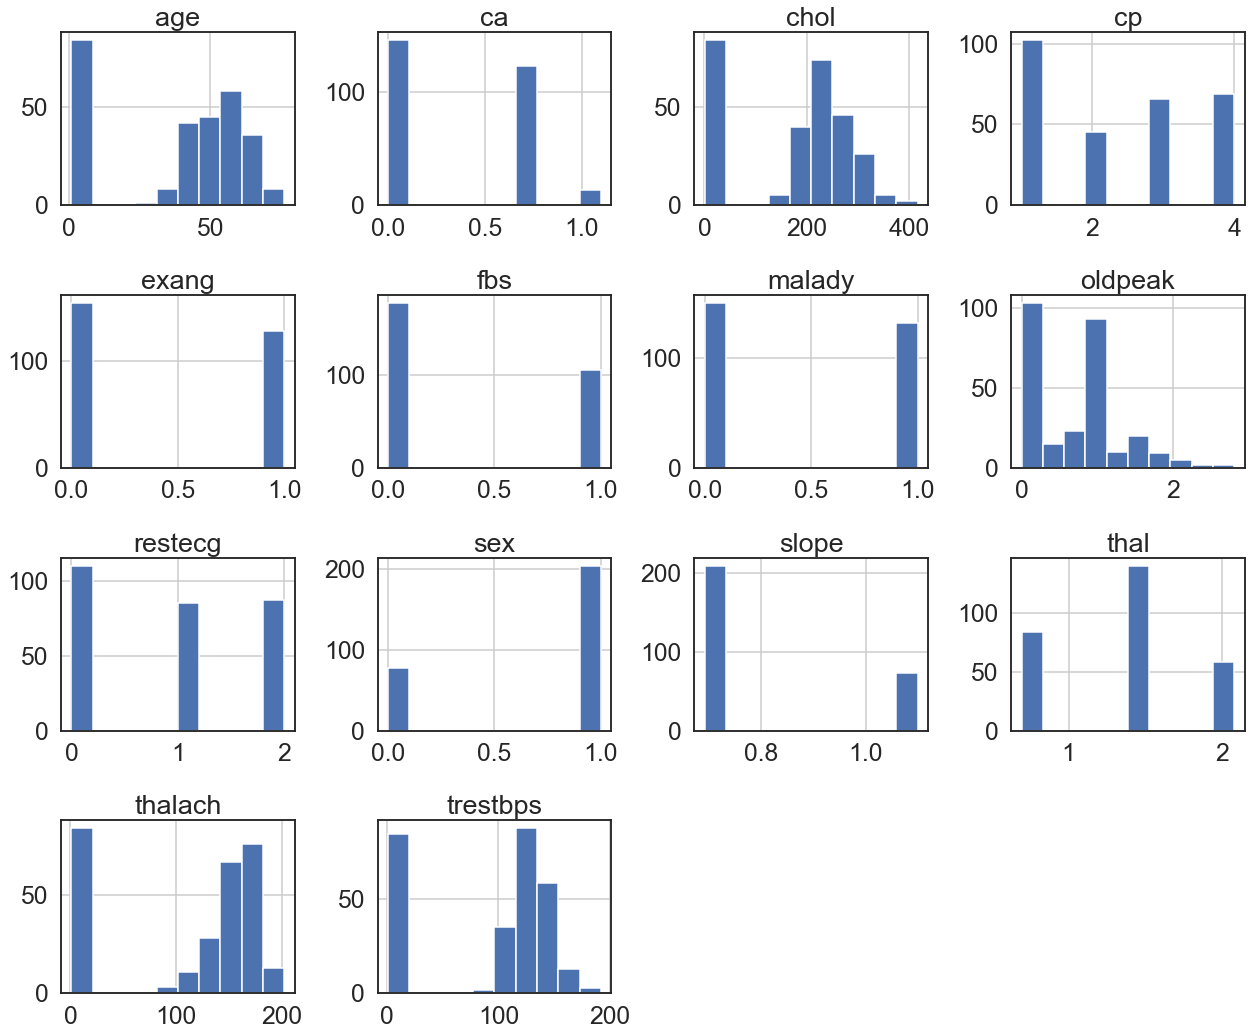

In [61]:
plt.figure(figsize=(12,3),dpi=100)
h.hist(figsize=(18,15),grid=True)
plt.tight_layout()

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score as cvs ,RandomizedSearchCV as rsv
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_curve,roc_auc_score,auc

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

import joblib
import warnings
warnings.filterwarnings('ignore')

In [63]:
h

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,malady
1,1.0,1,1,1.0,1.0,1,1,1.0,1,1.0,0.693147,0.693147,0.693147,1
2,67.0,1,4,120.0,229.0,0,2,129.0,1,2.6,1.098612,1.098612,2.079442,1
4,41.0,0,2,130.0,204.0,0,2,172.0,0,1.4,0.693147,0.000000,1.386294,0
5,56.0,1,2,120.0,236.0,0,0,178.0,0,0.8,0.693147,0.000000,1.386294,0
6,1.0,1,1,1.0,1.0,1,1,1.0,1,1.0,0.693147,0.693147,0.693147,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1,1,110.0,264.0,0,0,132.0,0,1.2,1.098612,0.000000,2.079442,1
299,1.0,1,1,1.0,1.0,1,1,1.0,1,1.0,0.693147,0.693147,0.693147,1
300,1.0,1,1,1.0,1.0,1,1,1.0,1,1.0,0.693147,0.693147,0.693147,1
301,57.0,0,2,130.0,236.0,0,2,174.0,0,0.0,1.098612,0.693147,1.386294,1


In [64]:
#splitting the dataset into X and Y for training and testing
x=h.iloc[:,0:13]
y=h['malady']
print('x:',"--"*30,"\n", x,'\nshape of x:', x.shape)
print('\ny:',"--"*30,"\n", y,'\nshape of y:', y.shape)

x: ------------------------------------------------------------ 
       age  sex  cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
1     1.0    1   1       1.0    1.0    1        1      1.0      1      1.0   
2    67.0    1   4     120.0  229.0    0        2    129.0      1      2.6   
4    41.0    0   2     130.0  204.0    0        2    172.0      0      1.4   
5    56.0    1   2     120.0  236.0    0        0    178.0      0      0.8   
6     1.0    1   1       1.0    1.0    1        1      1.0      1      1.0   
..    ...  ...  ..       ...    ...  ...      ...      ...    ...      ...   
298  45.0    1   1     110.0  264.0    0        0    132.0      0      1.2   
299   1.0    1   1       1.0    1.0    1        1      1.0      1      1.0   
300   1.0    1   1       1.0    1.0    1        1      1.0      1      1.0   
301  57.0    0   2     130.0  236.0    0        2    174.0      0      0.0   
302  38.0    1   3     138.0  175.0    0        0    173.0      0      0.0  

In [65]:
#Using StandardScaler Feature to standardise the values of x
ss=StandardScaler()
x=ss.fit_transform(x)
print(x)

[[-1.4599741   0.61834694 -1.13332042 ... -0.5910011   0.90718232
  -1.29684242]
 [ 1.16975957  0.61834694  1.36352613 ...  1.69204424  1.98849123
   1.57756794]
 [ 0.13380388 -1.61721508 -0.30103824 ... -0.5910011  -0.94132748
   0.14036276]
 ...
 [-1.4599741   0.61834694 -1.13332042 ... -0.5910011   0.90718232
  -1.29684242]
 [ 0.77131507 -1.61721508 -0.30103824 ...  1.69204424  0.90718232
   0.14036276]
 [ 0.01427053  0.61834694  0.53124395 ... -0.5910011  -0.94132748
   0.14036276]]


In [66]:
#converting y into  np.array format form pandas.core.series.Series form and reshaping it in the form of 1 columns and many rows
y=np.array(y)
y=y.reshape(-1,1)
y

array([[1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
    

In [67]:
#creating a function to achive the highest perfoming random score for all model to be used
def acusr(model,x,y):
    max_ac_score=0
    for rst in range(25,180):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=rst)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        ascr=accuracy_score(pred,y_test)
        f1=f1_score(pred,y_test)
        clr=classification_report(y_test,pred)
        conf=confusion_matrix(y_test,pred)
        auc_scores=roc_auc_score(y_test,pred)
        tpr,fpr,threshold=roc_curve(y_test,pred)
        if ascr>max_ac_score:
            max_ac_score=ascr
            final_rst=rst
    print("In this",model,'\n\nThe best suited random_score is: ', final_rst, '\n\nAccuracy score:', max_ac_score)
    print('\nF1 SCORE:', f1)
    print('\nCONFUSION MATRIX:\n',conf)
    print('\nAUC_ROC Score:\n',auc_scores)
    print('\nTPR:',tpr.mean(),'\nFPR:',fpr.mean(),'\nThresholds:', threshold)
    return final_rst

LOGISTIC REGRESSION

In [68]:
logi=LogisticRegression()
acusr(logi,x,y)

In this LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 

The best suited random_score is:  42 

Accuracy score: 0.9292929292929293

F1 SCORE: 0.7872340425531916

CONFUSION MATRIX:
 [[42  6]
 [14 37]]

AUC_ROC Score:
 0.8002450980392156

TPR: 0.375 
FPR: 0.5751633986928105 
Thresholds: [2 1 0]


42

In [69]:
#using cross_val_score to check for over/under fitting of logistic regressor model
logi_accuracy=cvs(logi,x,y,scoring='accuracy',cv=18)
logi_roc_auc=cvs(logi,x,y,scoring='roc_auc',cv=18)
print('THE ACCURACY SCORE AT LOGISTIC MODEL IS=', logi_accuracy.mean())
print('THE AUC_ROC SCORE AT LOGISTIC MODEL IS=', logi_roc_auc.mean())

THE ACCURACY SCORE AT LOGISTIC MODEL IS= 0.8697167755991285
THE AUC_ROC SCORE AT LOGISTIC MODEL IS= 0.9248236331569664


DECISION TREE CLASSIFIER

In [70]:
#using RandomizedSearchCV to get best parameters for optimum performance of DTC model

dtc=DecisionTreeClassifier()
dtc_para={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth': range(4,10),'min_samples_split':range(2,8)}
dtc_rs=rsv(dtc,dtc_para,cv=18)
dtc_rs.fit(x,y)
print(dtc_rs,'\n')
print(dtc_rs.best_score_,'\n')
print(dtc_rs.best_params_)

RandomizedSearchCV(cv=18, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best'

In [71]:
dtc=DecisionTreeClassifier(splitter='random',min_samples_split=2,max_depth=5,criterion='gini')
m2=acusr(dtc,x,y)

In this DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random') 

The best suited random_score is:  58 

Accuracy score: 0.9292929292929293

F1 SCORE: 0.7555555555555555

CONFUSION MATRIX:
 [[43  5]
 [17 34]]

AUC_ROC Score:
 0.78125

TPR: 0.3680555555555556 
FPR: 0.5555555555555555 
Thresholds: [2 1 0]


In [72]:
#using cross_val_score to check for over/under fitting of DTC model
dtc_accuracy=cvs(dtc,x,y,scoring='accuracy',cv=30)
dtc_roc_auc=cvs(dtc,x,y,scoring='roc_auc',cv=30)
print('THE ACCURACY SCORE AT DTC MODEL IS=', dtc_accuracy.mean())
print('THE AUC_ROC SCORE AT DTC MODEL IS=',  dtc_roc_auc.mean())

THE ACCURACY SCORE AT DTC MODEL IS= 0.8396296296296296
THE AUC_ROC SCORE AT DTC MODEL IS= 0.8748333333333334


SUPPORT VECTOR CLASSIFIER

In [73]:
svc=SVC()
svc_para={'kernel':['rbf','poly','linear'],'gamma':[0.01,0.1],'degree':[3,5,7,9],'C':[3,5,6]}
svc_rsv=rsv(svc,svc_para,cv=30)
svc_rsv.fit(x,y)
print(svc_rsv)
print('\nbest score=', svc_rsv.best_score_)
print("\nbest parameters for SVC=\n",svc_rsv.best_params_)

RandomizedSearchCV(cv=30, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, probability=False,
                                 random_state=None, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'C': [3, 5, 6], 'degree': [3, 5, 7, 9],
                                        'gamma': [0.01, 0.1],
                                        'kernel': ['rbf', 'poly', 'linear']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

best score= 0.8794326241134752

best parameters for SVC=
 {'kernel': 'rbf', 'gamma': 0.01, 'deg

In [74]:
svc=SVC(kernel='rbf',gamma=0.01,degree=9,C=5)
m3=acusr(svc,x,y)

In this SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=9, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 

The best suited random_score is:  42 

Accuracy score: 0.9292929292929293

F1 SCORE: 0.7816091954022987

CONFUSION MATRIX:
 [[46  2]
 [17 34]]

AUC_ROC Score:
 0.8124999999999999

TPR: 0.34722222222222227 
FPR: 0.5555555555555555 
Thresholds: [2 1 0]


In [75]:
#using cross_val_score to check for over/under fitting of SVC model
svc_accuracy=cvs(svc,x,y,scoring='accuracy',cv=30)
svc_roc_auc=cvs(svc,x,y,scoring='roc_auc',cv=30)
print('THE ACCURACY SCORE AT SVC MODEL IS=', svc_accuracy.mean())
print('THE AUC_ROC SCORE AT SVC MODEL IS=',  svc_roc_auc.mean())

THE ACCURACY SCORE AT SVC MODEL IS= 0.8777777777777779
THE AUC_ROC SCORE AT SVC MODEL IS= 0.9256666666666665


K_NEIGHBORS CLASSIFIERS

In [76]:
#using KNeighborsClassifier algo with RandomizedSearchCV to get best parameters for optimum performance
knc=KNeighborsClassifier()
knc_para={'n_neighbors':range(20,65),'algorithm':['ball_tree','kd_tree','brute'],'leaf_size':[10,30,35]}
knc_rsv=rsv(knc,knc_para,cv=30)
knc_rsv.fit(x,y)
print(knc_rsv)
print('\nbest score=',knc_rsv.best_score_)
print('\nbest parameters for KNC=\n',knc_rsv.best_params_)

RandomizedSearchCV(cv=30, error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'leaf_size': [10, 30, 35],
                                        'n_neighbors': range(20, 65)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

best score= 0.8581560283687943

bes

In [77]:
knc=KNeighborsClassifier(n_neighbors=34,algorithm='brute',leaf_size=35)
m4=acusr(knc,x,y)

In this KNeighborsClassifier(algorithm='brute', leaf_size=35, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=34, p=2,
                     weights='uniform') 

The best suited random_score is:  42 

Accuracy score: 0.9191919191919192

F1 SCORE: 0.6399999999999999

CONFUSION MATRIX:
 [[48  0]
 [27 24]]

AUC_ROC Score:
 0.7352941176470589

TPR: 0.3333333333333333 
FPR: 0.4901960784313726 
Thresholds: [2 1 0]


In [78]:
#using cross_val_score to check for over/under fitting of KNC model
knc_accuracy=cvs(knc,x,y,scoring='accuracy',cv=30)
knc_roc_auc=cvs(knc,x,y,scoring='roc_auc',cv=30)
print('THE ACCURACY SCORE AT KNC MODEL IS=', knc_accuracy.mean())
print('THE AUC_ROC SCORE AT KNC MODEL IS=',  knc_roc_auc.mean())

THE ACCURACY SCORE AT KNC MODEL IS= 0.857777777777778
THE AUC_ROC SCORE AT KNC MODEL IS= 0.9201666666666668


GAUSSIAN NB

In [79]:
gnb=GaussianNB()
m5=acusr(gnb,x,y)

In this GaussianNB(priors=None, var_smoothing=1e-09) 

The best suited random_score is:  42 

Accuracy score: 0.9090909090909091

F1 SCORE: 0.6399999999999999

CONFUSION MATRIX:
 [[48  0]
 [27 24]]

AUC_ROC Score:
 0.7352941176470589

TPR: 0.3333333333333333 
FPR: 0.4901960784313726 
Thresholds: [2 1 0]


In [80]:
#using cross_val_score to check for over/under fitting of KNC model
gnb_accuracy=cvs(gnb,x,y,scoring='accuracy',cv=30)
gnb_roc_auc=cvs(gnb,x,y,scoring='roc_auc',cv=30)
print('THE ACCURACY SCORE AT GNB MODEL IS=', gnb_accuracy.mean())
print('THE AUC_ROC SCORE AT GNB MODEL IS=',  gnb_roc_auc.mean())

THE ACCURACY SCORE AT GNB MODEL IS= 0.8374074074074075
THE AUC_ROC SCORE AT GNB MODEL IS= 0.9036666666666666


RANDOM FOREST CLASSIFIER

In [81]:
rfc=RandomForestClassifier()
rfc_para={"n_estimators":[200,400],'max_depth':[6,9],'criterion':('gini','entropy')}
rfc_rsv=rsv(rfc,rfc_para,cv=30)
rfc_rsv.fit(x,y)
print(rfc_rsv)
print('\nbest score=',rfc_rsv.best_score_)
print('\nbest parameters for RFC=\n',rfc_rsv.best_params_)

RandomizedSearchCV(cv=30, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=Non

In [82]:
rfc=RandomForestClassifier(n_estimators=400,max_depth=6,criterion='gini')
m6=acusr(rfc,x,y)

In this RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 

The best suited random_score is:  42 

Accuracy score: 0.9393939393939394

F1 SCORE: 0.7764705882352942

CONFUSION MATRIX:
 [[47  1]
 [18 33]]

AUC_ROC Score:
 0.8131127450980391

TPR: 0.34027777777777773 
FPR: 0.5490196078431372 
Thresholds: [2 1 0]


In [83]:
rfc_accuracy=cvs(rfc,x,y,scoring='accuracy',cv=30)
rfc_roc_auc=cvs(rfc,x,y,scoring='roc_auc',cv=30)
print('THE ACCURACY SCORE AT RFC MODEL IS=', rfc_accuracy.mean())
print('THE AUC_ROC SCORE AT RFC MODEL IS=',  rfc_roc_auc.mean())

THE ACCURACY SCORE AT RFC MODEL IS= 0.8744444444444445
THE AUC_ROC SCORE AT RFC MODEL IS= 0.9309999999999998


GRADIENT BOOSTING REGRESSOR

In [84]:
gbc=GradientBoostingClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=85)
para= {"learning_rate": [0.0001,0.025,0.01],"max_depth":range(5,9),"n_estimators":[250,450]}
gbc_rs= rsv(gbc,para,cv=30)
gbc_rs.fit(x_train,y_train)
print(gbc_rs)
print("\nbest parameters:",gbc_rs.best_params_)
print("\n best score:",gbc_rs.best_score_)

RandomizedSearchCV(cv=30, error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                    

In [85]:
gbc=GradientBoostingClassifier(learning_rate=0.01,max_depth=5,n_estimators=450)
m7=acusr(gbc,x,y)

In this GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=450,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) 

The best suited random_score is:  42 

Accuracy score: 0.9090909090909091

F1 SCORE: 0.7311827956989246

CONFUSION MATRIX:
 [[40  8]
 [17 34]]

AUC_ROC Score:
 0.75

TPR: 0.3888888888888889 
FPR: 0.5555555555555555 
Thresholds: [2 1 0]


In [86]:
gbc_accuracy=cvs(gbc,x,y,scoring='accuracy',cv=30)
gbc_roc_auc=cvs(gbc,x,y,scoring='roc_auc',cv=30)
print('THE ACCURACY SCORE AT GBC MODEL IS=', gbc_accuracy.mean())
print('THE AUC_ROC SCORE AT GBC MODEL IS=',  gbc_roc_auc.mean())

THE ACCURACY SCORE AT GBC MODEL IS= 0.8351851851851853
THE AUC_ROC SCORE AT GBC MODEL IS= 0.9303333333333333


In [88]:

results=[['LOGI REG',0.929292,0.3750,0.5751,0.80024,0.86971,0.924823],
      ['DTC',0.929292,0.36805,0.5555,0.78125,0.839629,0.874833],
      ['SVC',0.929292,0.34722,0.5555,0.81249,0.87777,0.92566],
      ['KNC',0.919191,0.33333,0.49019,0.73529,0.85778,0.92016,],
      ['GNB',0.90909,0.33333,0.49019,0.73529,0.83740,0.90366],
      ['RFC',0.93939,0.340277,0.549019,0.813112,0.87444,0.93099],
      ['GBC',0.90909,0.38888,0.5555,0.75,0.83518,0.93033]]
performance=pd.DataFrame(results,columns=['MODEL_NAME','ACCURACY W\O CV','TPR','FPR',
                                'AUC SCORE W/O CV','ACCURACY W CV','AUC SCORE W CV'])
performance


,MODEL_NAME,ACCURACY W\O CV,TPR,FPR,AUC SCORE W/O CV,ACCURACY W CV,AUC SCORE W CV
0,LOGI REG,0.929292,0.375000,0.575100,0.800240,0.869710,0.924823
1,DTC,0.929292,0.368050,0.555500,0.781250,0.839629,0.874833
2,SVC,0.929292,0.347220,0.555500,0.812490,0.877770,0.925660
3,KNC,0.919191,0.333330,0.490190,0.735290,0.857780,0.920160
4,GNB,0.909090,0.333330,0.490190,0.735290,0.837400,0.903660
5,RFC,0.939390,0.340277,0.549019,0.813112,0.874440,0.930990
6,GBC,0.909090,0.388880,0.555500,0.750000,0.835180,0.930330


In [ ]:
so basing on the above results we'll use AdaBoostClassifier to boost the model. 
Taking SVC as the base model to boost

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=125)
svc=SVC(kernel='rbf',gamma=0.01,degree=9,C=5)
para={'n_estimators':(70,80),'learning_rate':(0.1,0.0023,0.25)}
abc=AdaBoostClassifier(base_estimator=svc,algorithm='SAMME')
abc_rs=rsv(abc,para,cv=30)
abc_rs.fit(x_train,y_train)
print(abc_rs)
print("best parameters:", abc_rs.best_params_)
print("\n best score:",abc_rs.best_score_)


RandomizedSearchCV(cv=30, error_score='raise-deprecating',
                   estimator=AdaBoostClassifier(algorithm='SAMME',
                                                base_estimator=SVC(C=5,
                                                                   cache_size=200,
                                                                   class_weight=None,
                                                                   coef0=0.0,
                                                                   decision_function_shape='ovr',
                                                                   degree=9,
                                                                   gamma=0.01,
                                                                   kernel='rbf',
                                                                   max_iter=-1,
                                                                   probability=False,
                                                      

In [90]:
#creating the model using the abc parameters obtained from RandomizedSearchCV
abc=AdaBoostClassifier(base_estimator=svc,algorithm='SAMME',n_estimators=70,learning_rate=0.1)
acusr(abc,x,y)

In this AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=SVC(C=5, cache_size=200, class_weight=None,
                                      coef0=0.0, decision_function_shape='ovr',
                                      degree=9, gamma=0.01, kernel='rbf',
                                      max_iter=-1, probability=False,
                                      random_state=None, shrinking=True,
                                      tol=0.001, verbose=False),
                   learning_rate=0.1, n_estimators=70, random_state=None) 

The best suited random_score is:  67 

Accuracy score: 0.8686868686868687

F1 SCORE: 0.6399999999999999

CONFUSION MATRIX:
 [[48  0]
 [27 24]]

AUC_ROC Score:
 0.7352941176470589

TPR: 0.3333333333333333 
FPR: 0.4901960784313726 
Thresholds: [2 1 0]


67

It's clear that the Boosting is not working well so well take RFC as the final model 
Now using the values obtained to draw the curve 

In [93]:
performance.loc[performance['MODEL_NAME']=='RFC']

,MODEL_NAME,ACCURACY W\O CV,TPR,FPR,AUC SCORE W/O CV,ACCURACY W CV,AUC SCORE W CV
5,RFC,0.93939,0.340277,0.549019,0.813112,0.87444,0.93099


In [99]:
#saving the model
joblib.dump(rfc,'HEART_RFC.pkl')

['HEART_RFC.pkl']